In [38]:
import numpy as np
import cv2
from vizdoom import DoomGame, ScreenFormat

class VizDoomGym:
    def __init__(self, config_path):
        self.game = DoomGame()
        self.game.load_config(config_path)
        #self.game.set_screen_format(ScreenFormat.RGB24)
        self.game.set_depth_buffer_enabled(True)
        self.game.set_window_visible(True)
        self.game.init()

    def reset(self):
        self.game.new_episode()
        while self.game.get_state() is None:
            self.game.advance_action()
        return self.get_observation(self.game.get_state())

    def step(self, action):
        reward = self.game.make_action(np.identity(3)[action])
        done = self.game.is_episode_finished()
        state = np.zeros((100, 160, 2), np.uint8) if done else self.get_observation(self.game.get_state())
        info = {"info": 0 if done else self.game.get_state().game_variables[0]}
        return state, reward, done, info
    def get_observation(self, state):
        rgb = state.screen_buffer
        rgb = np.moveaxis(rgb, 0, -1)
        gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(cv2.resize(gray, (160, 100)), 100, 250)
        depth = state.depth_buffer
        depth_norm = cv2.resize(depth, (160, 100))
        depth_norm = ((depth_norm - np.min(depth_norm)) / (np.ptp(depth_norm) + 1e-5) * 255).astype(np.uint8)
        return np.stack([edges, depth_norm], axis=-1)

    def close(self):
        self.game.close()

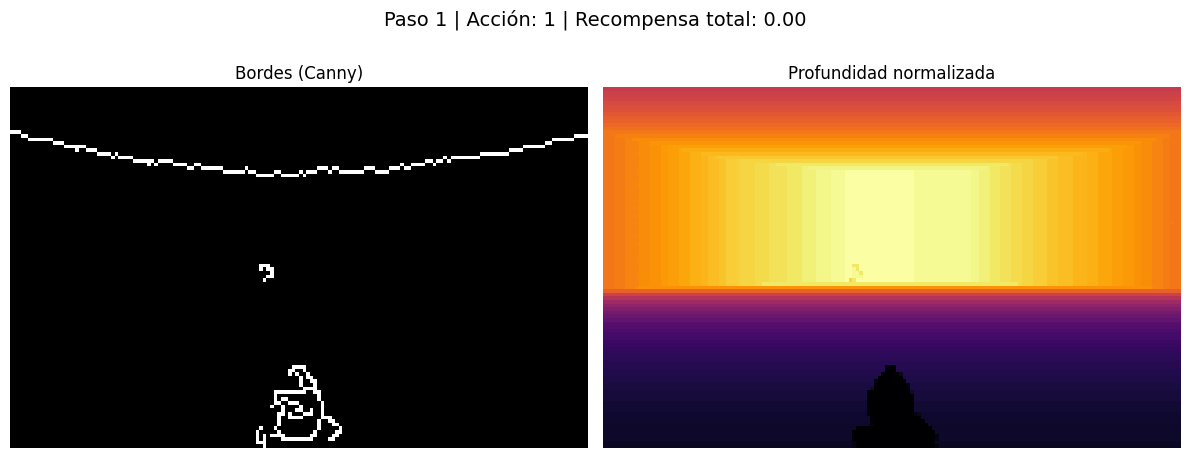

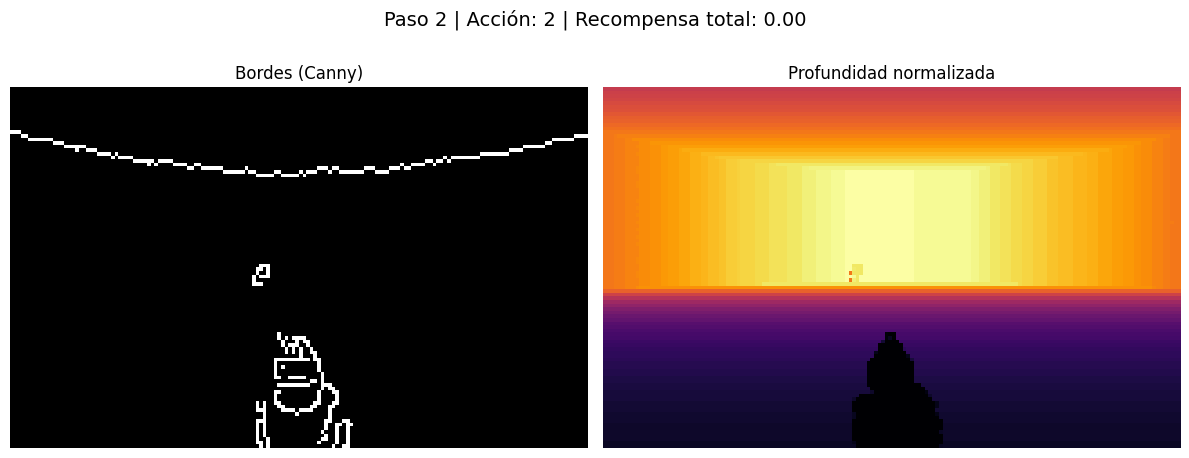

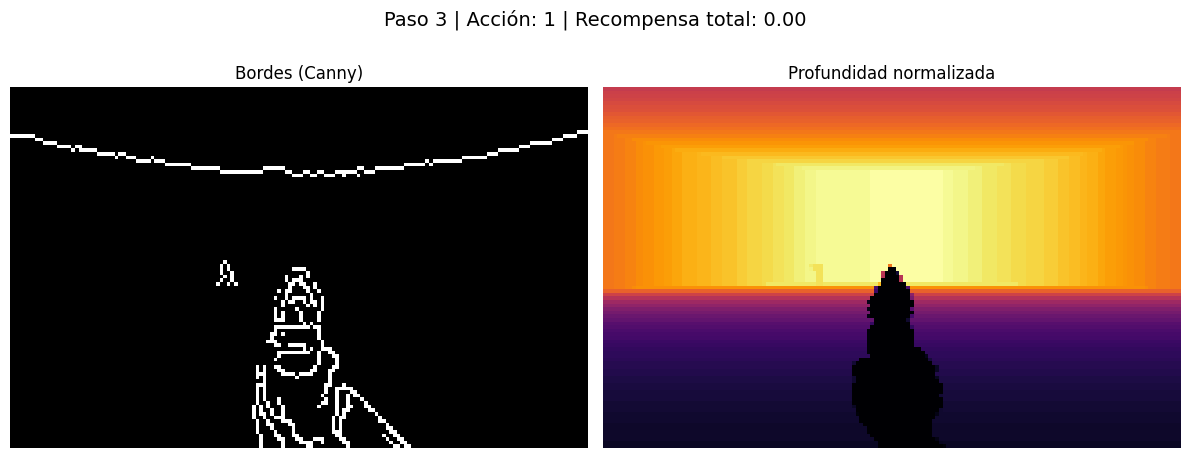

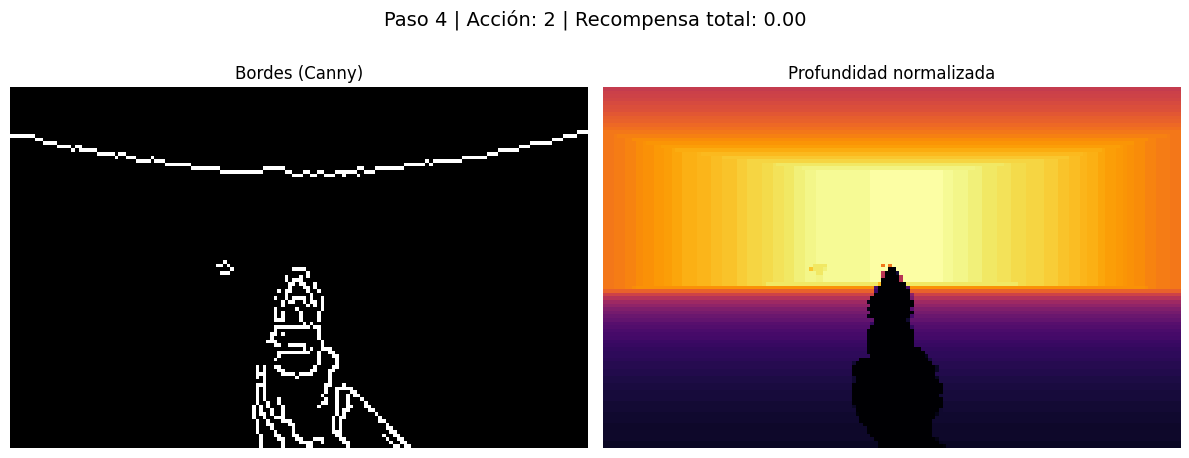

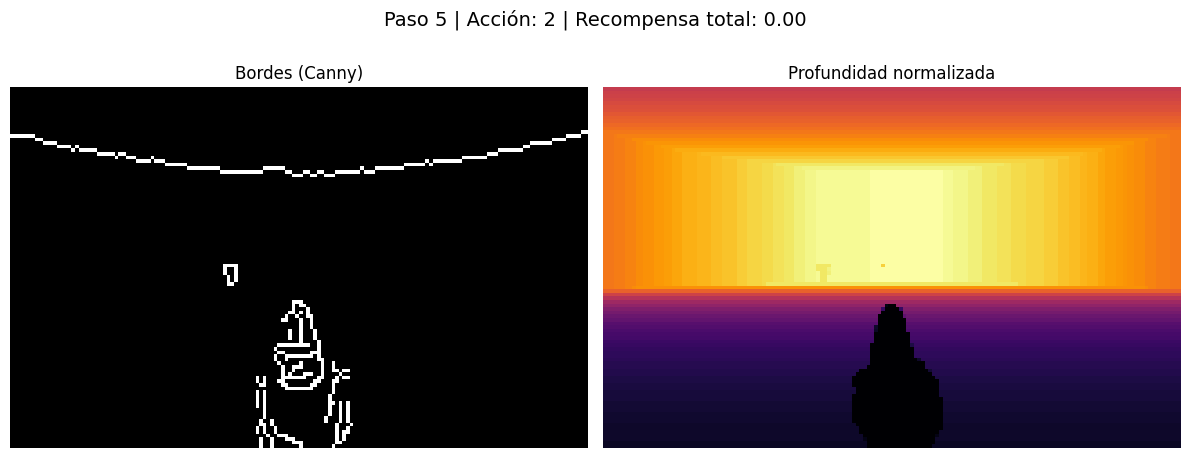

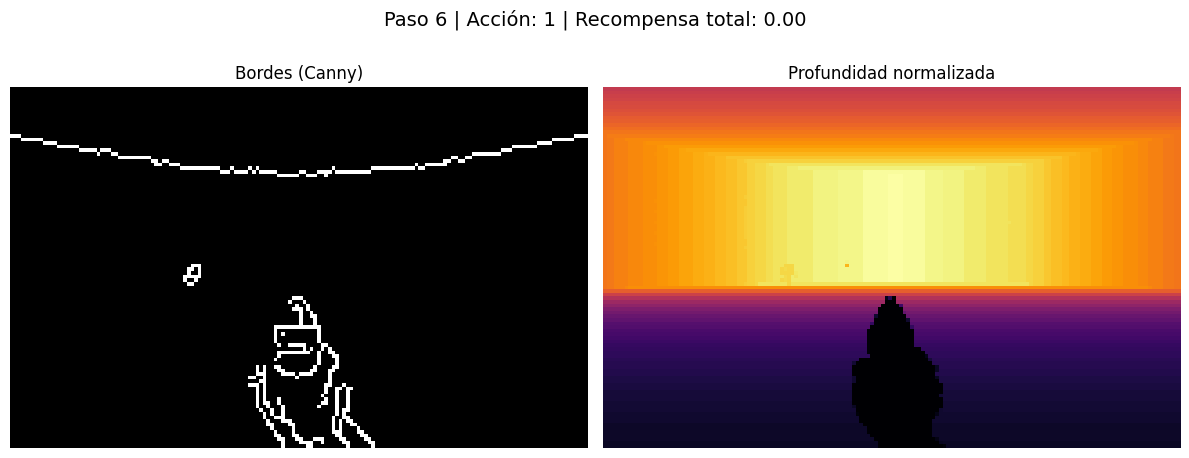

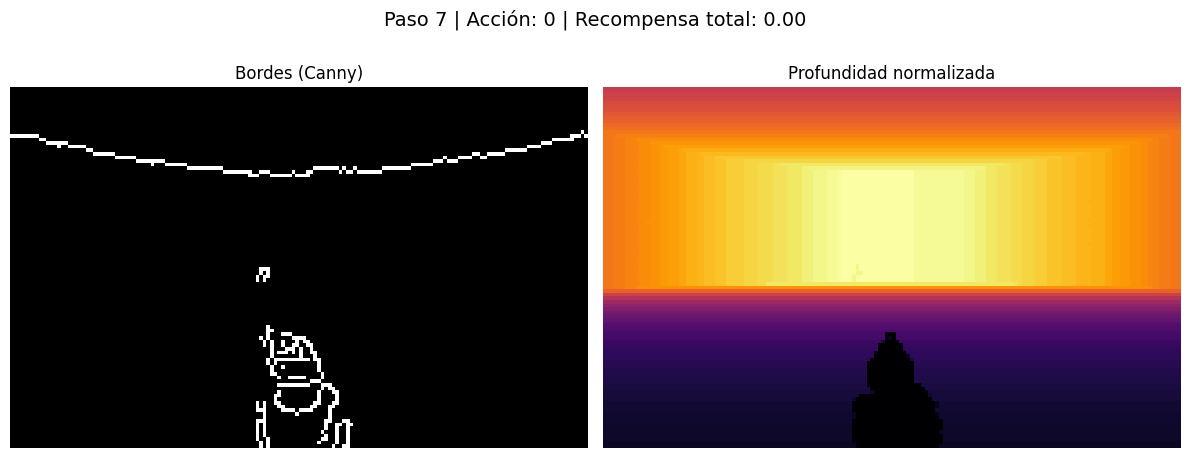

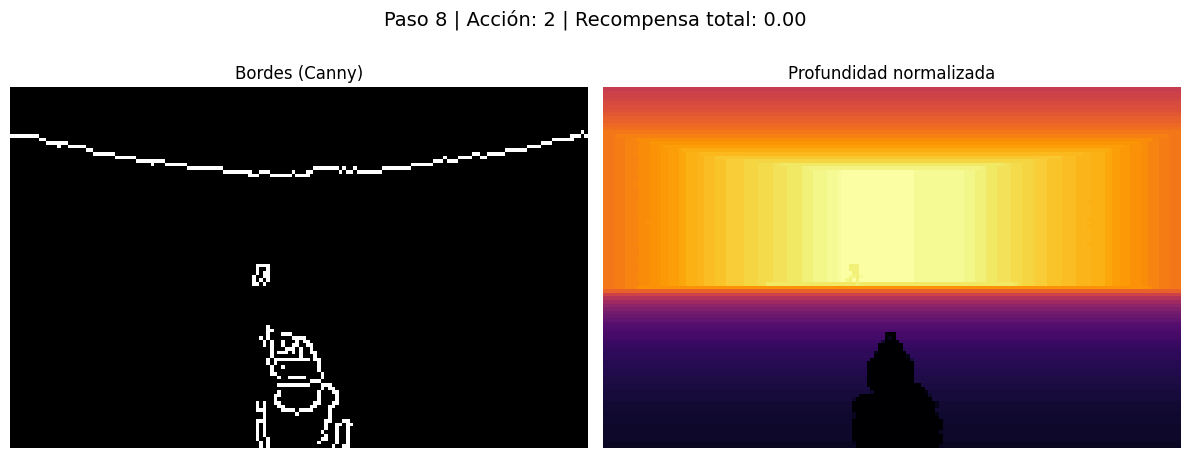

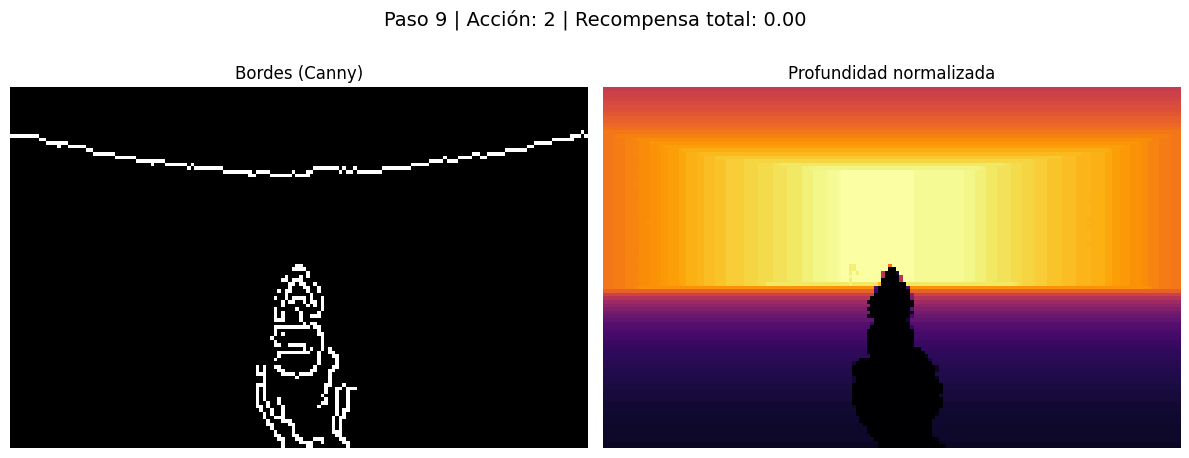

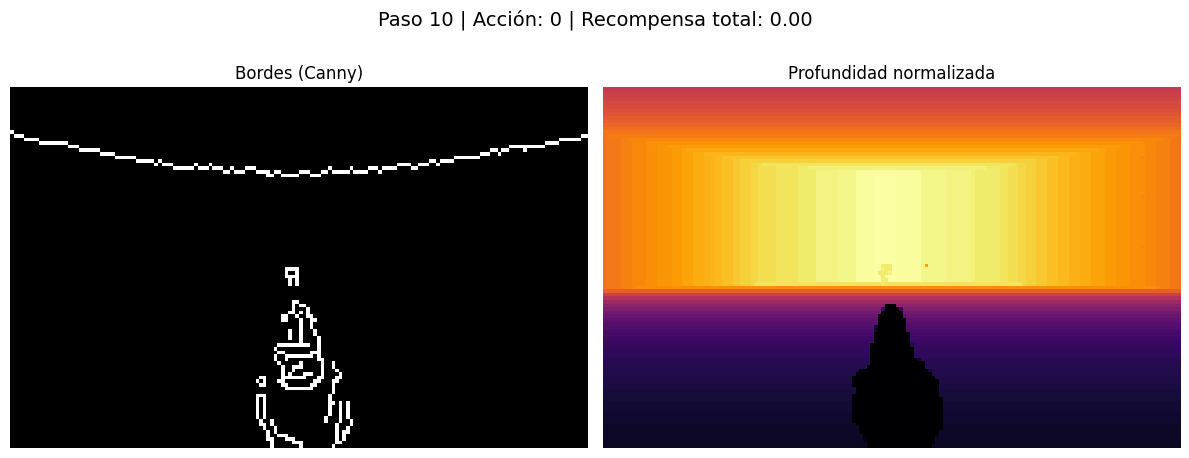

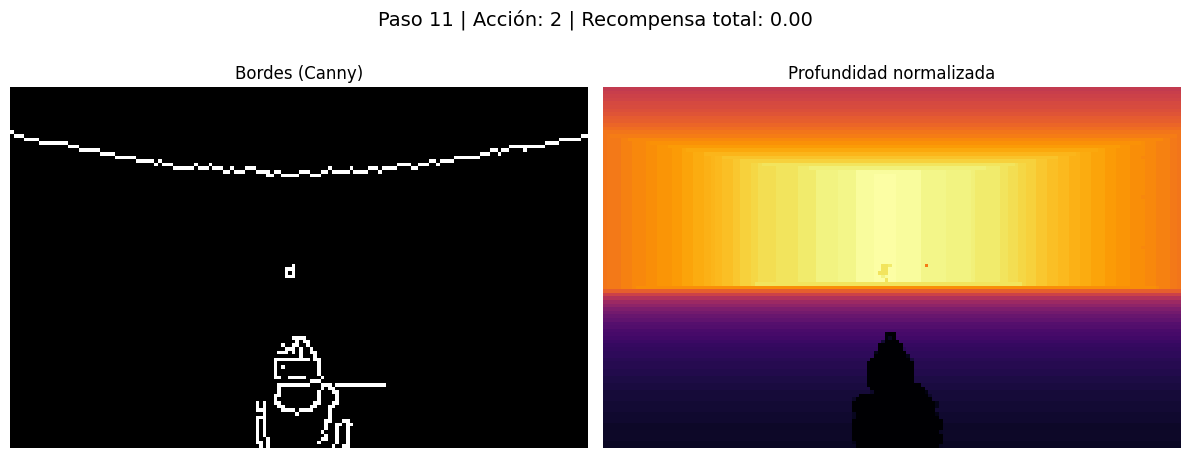

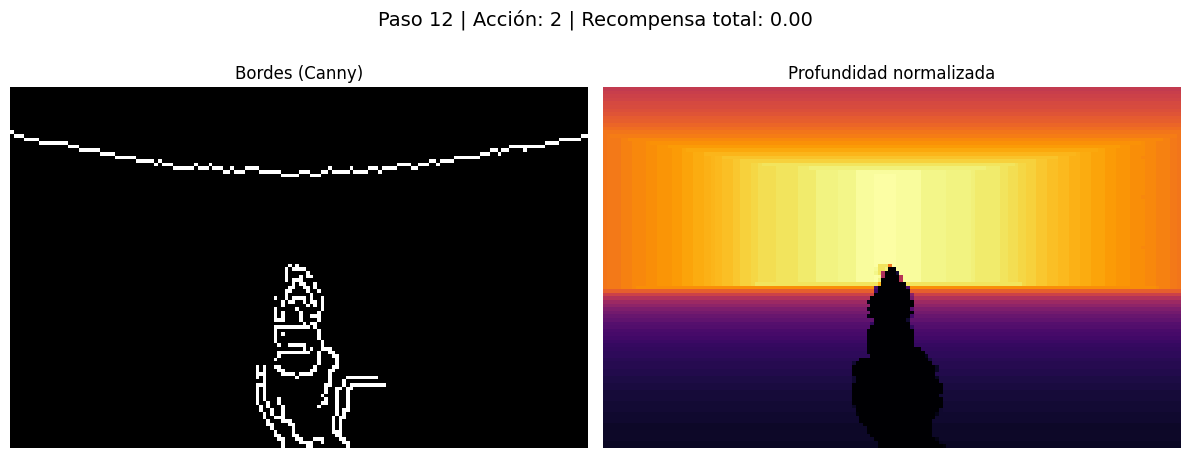

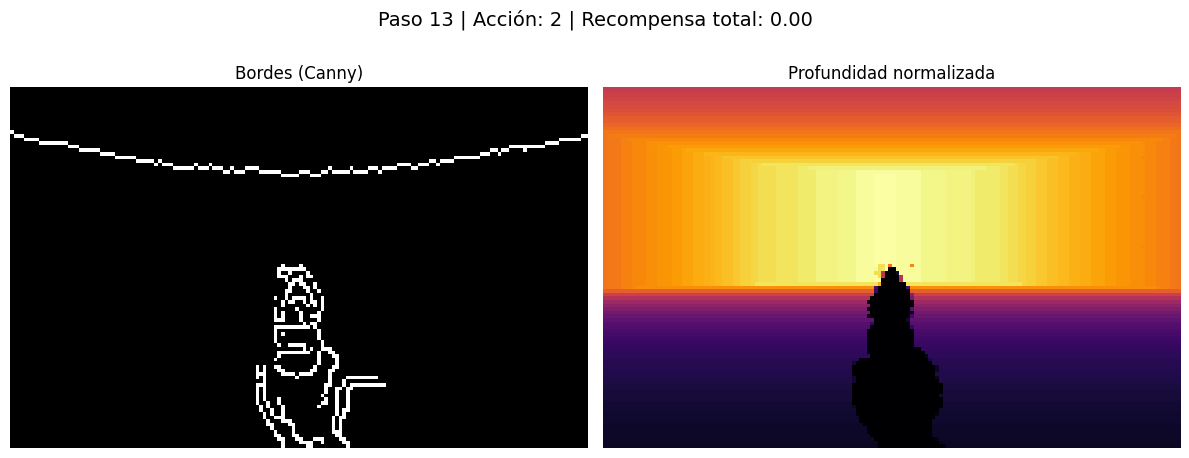

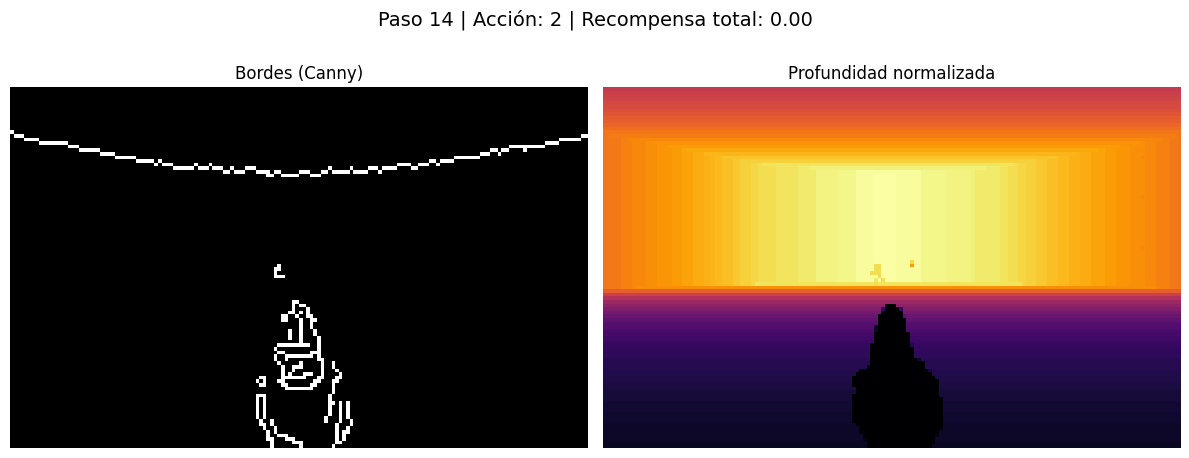

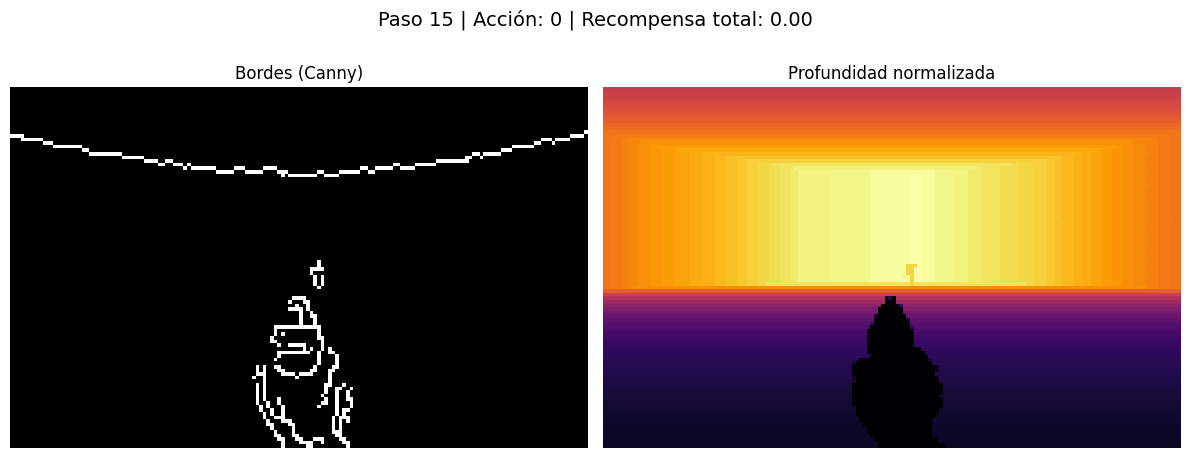

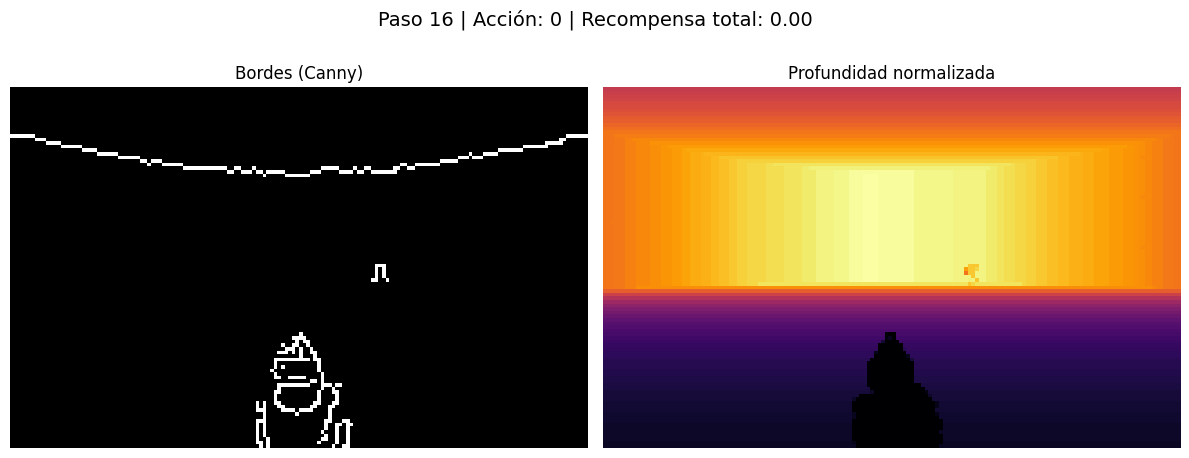

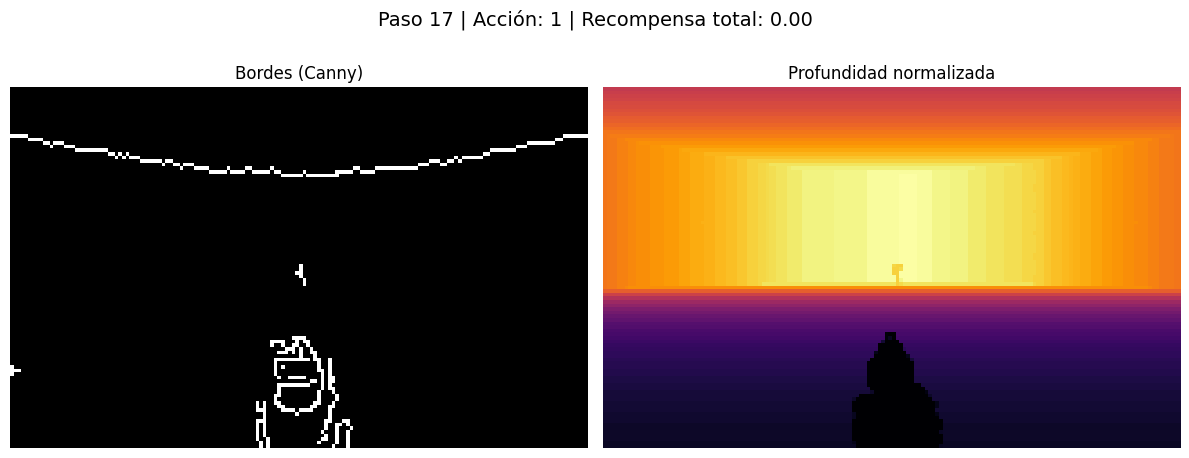

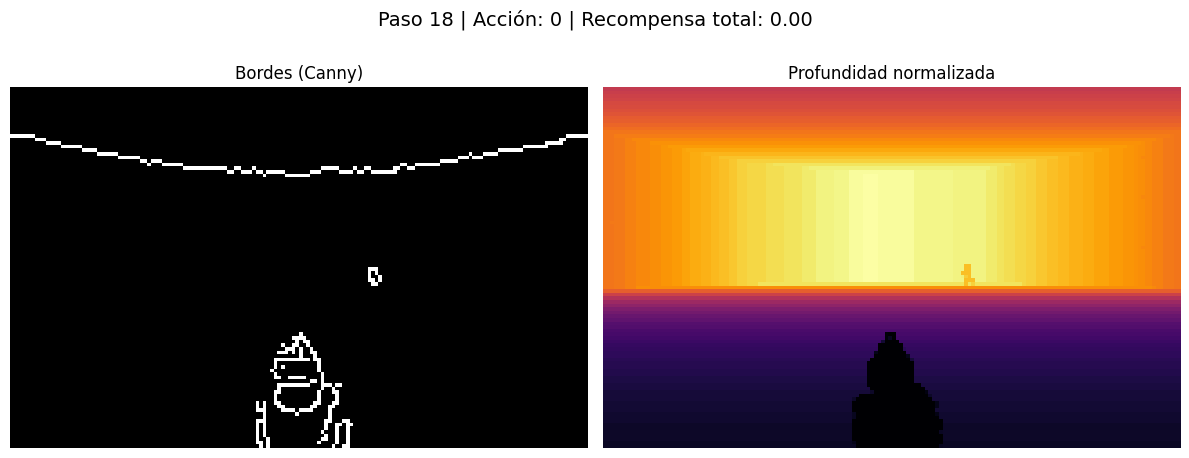

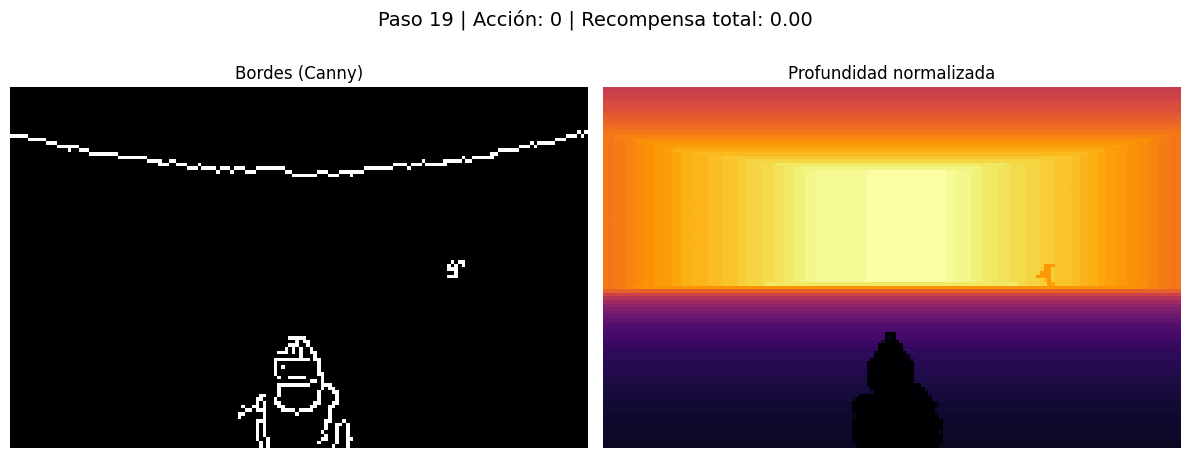

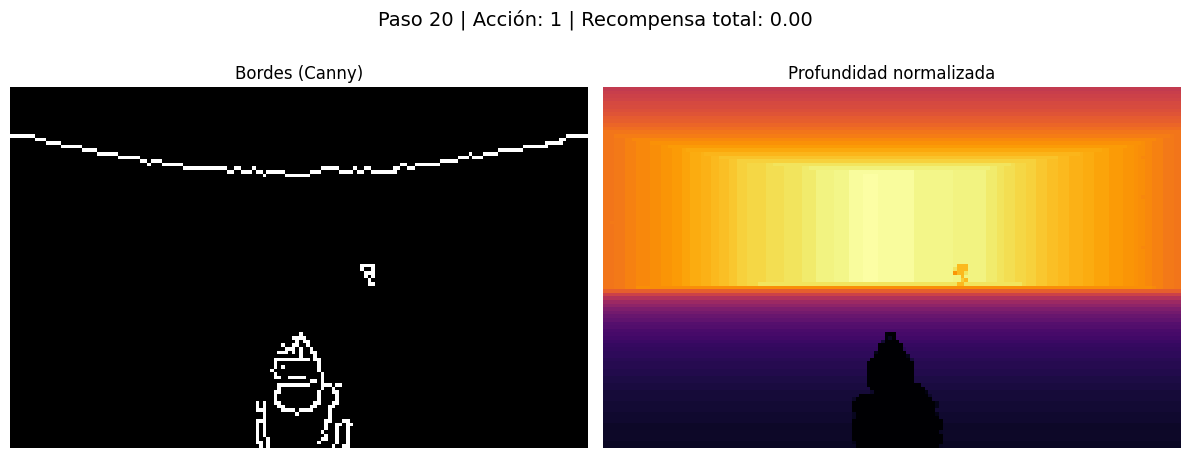

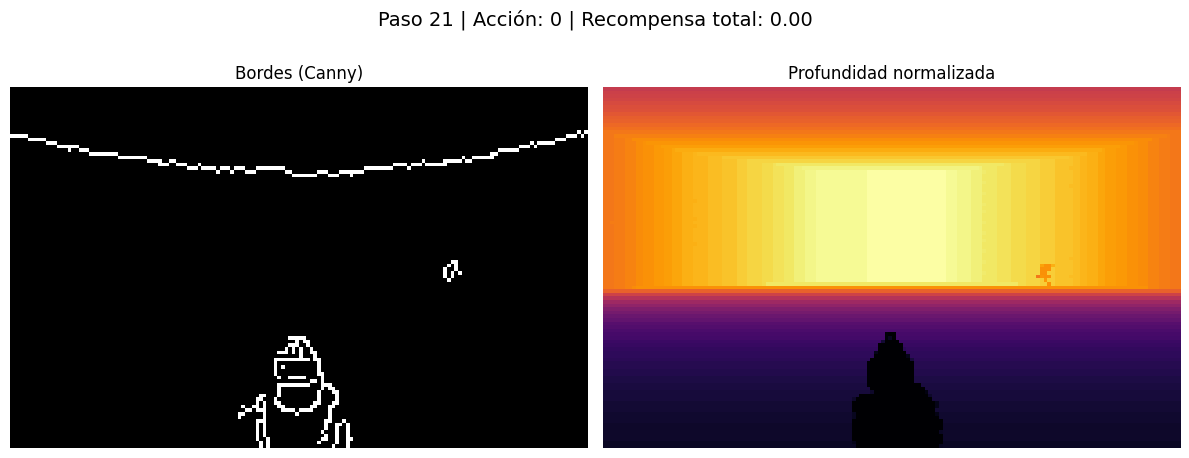

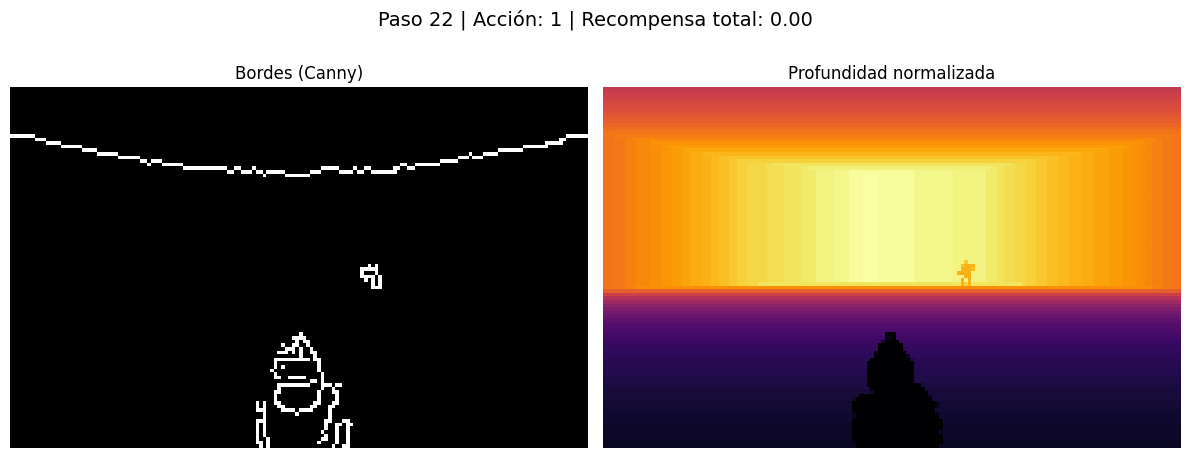

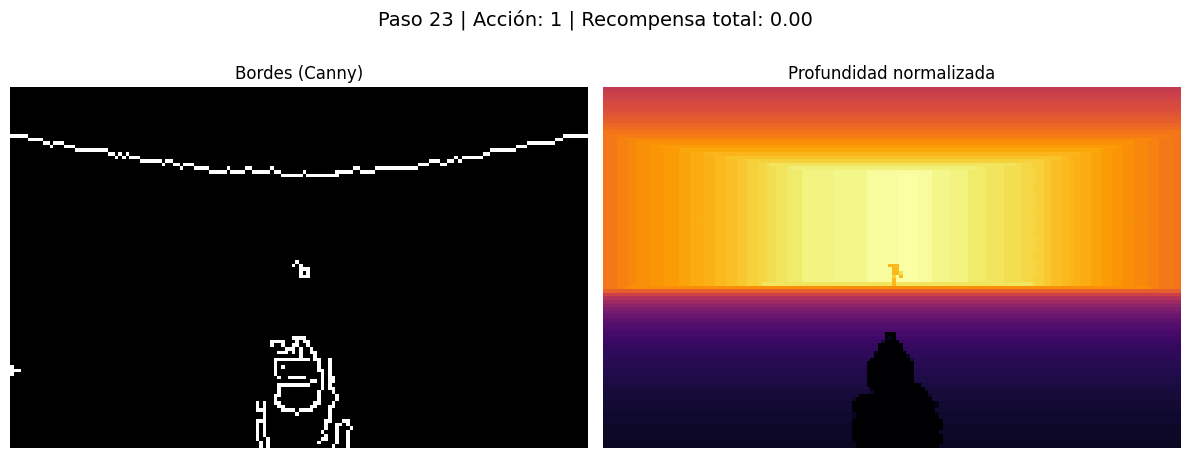

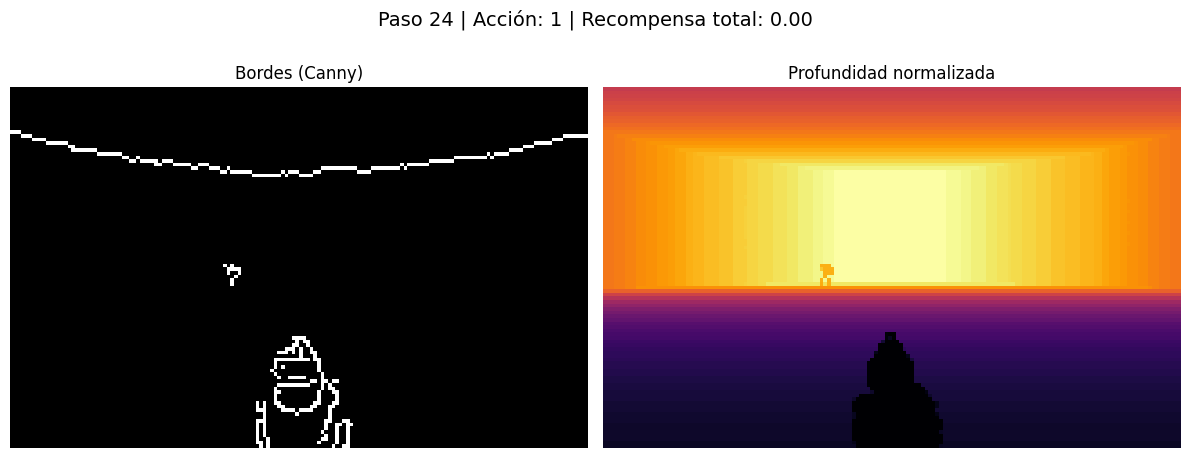

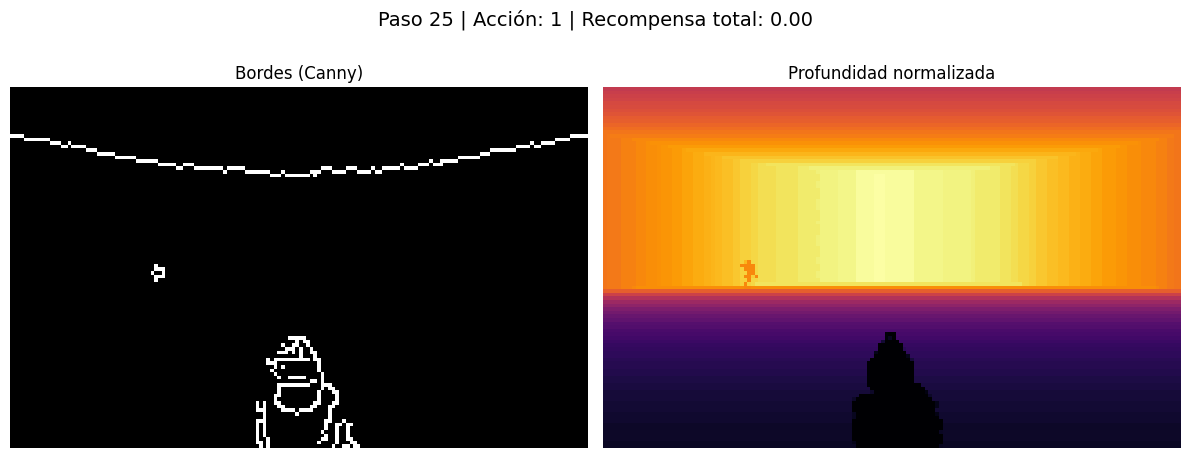

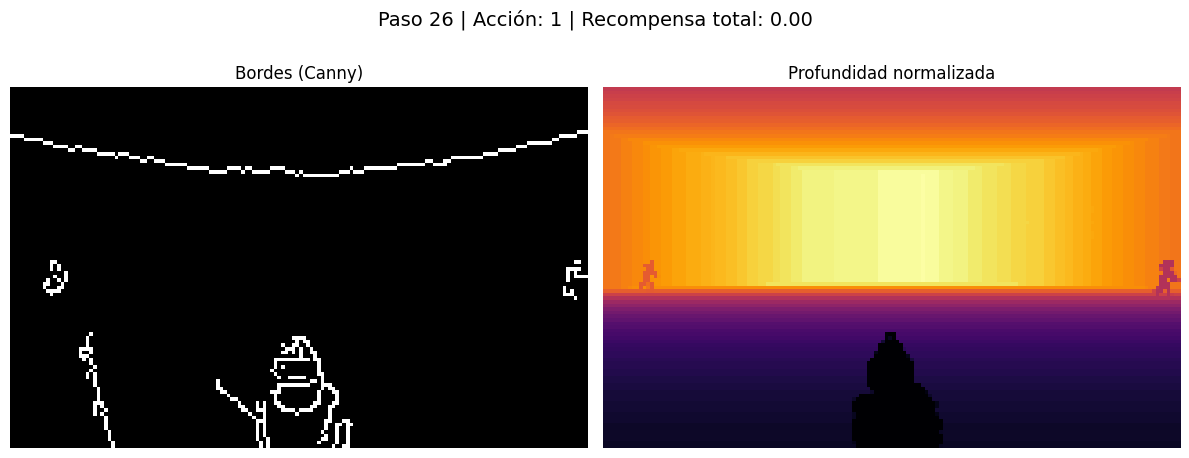

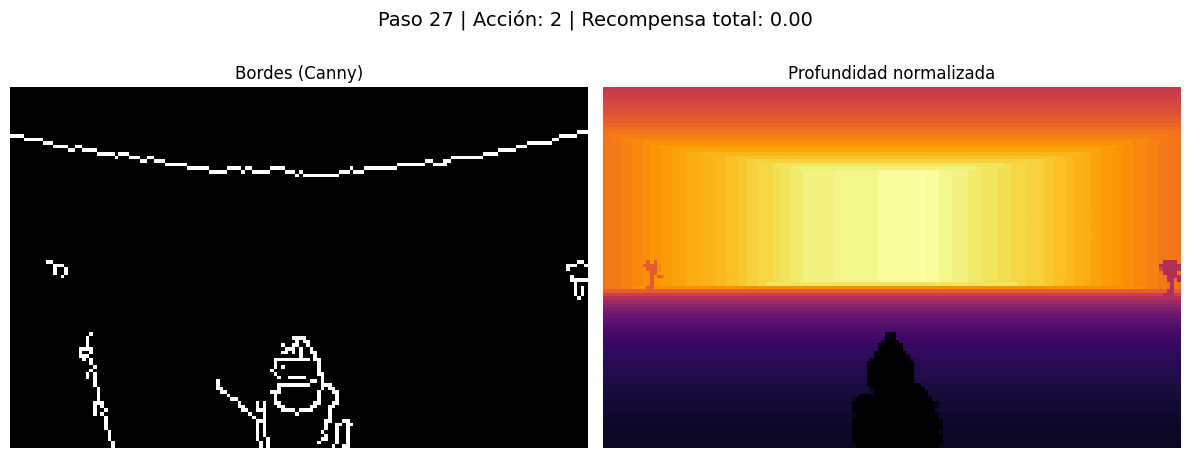

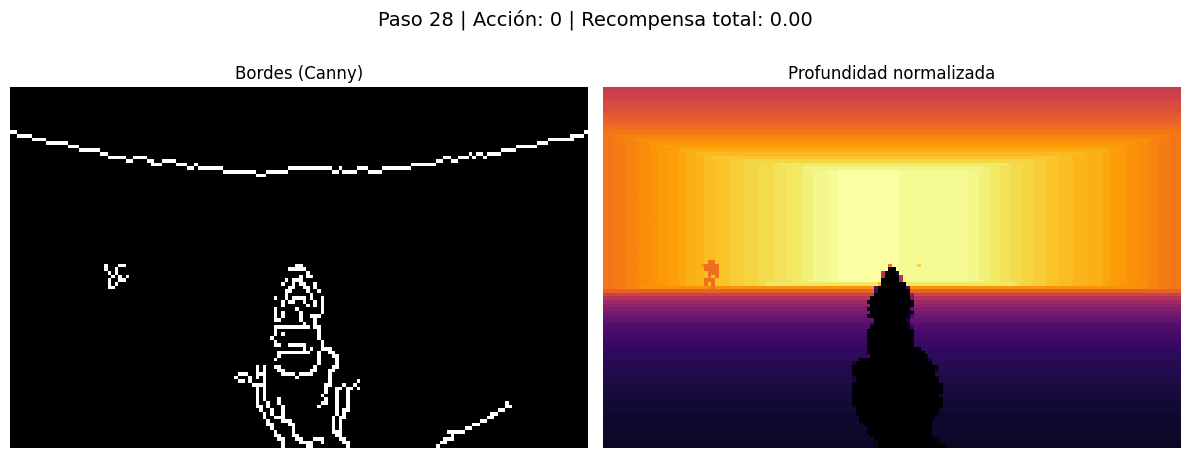

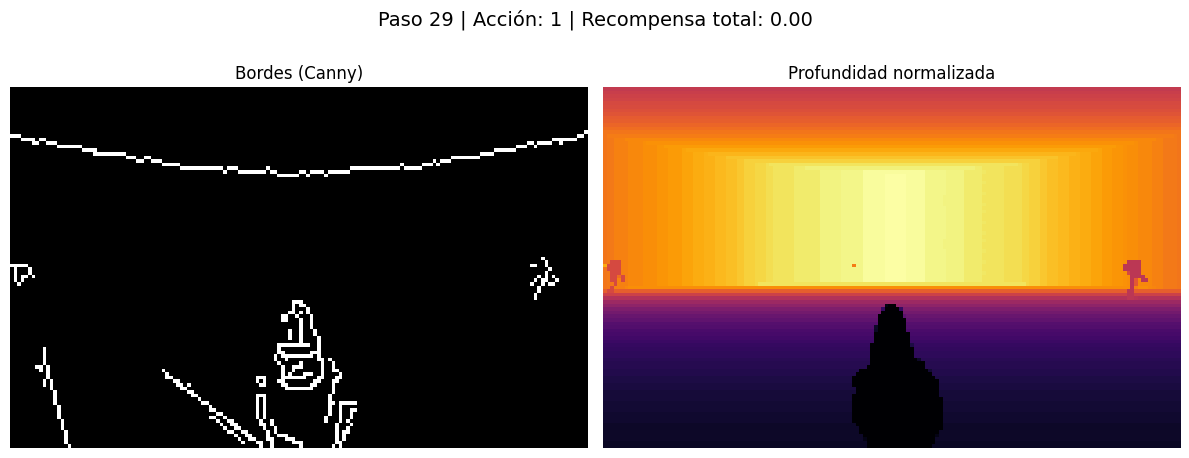

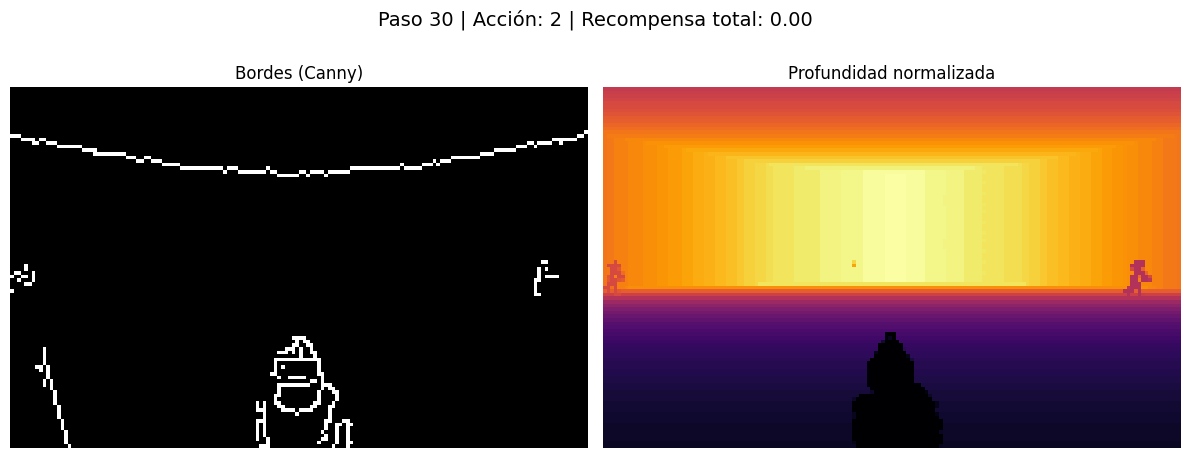

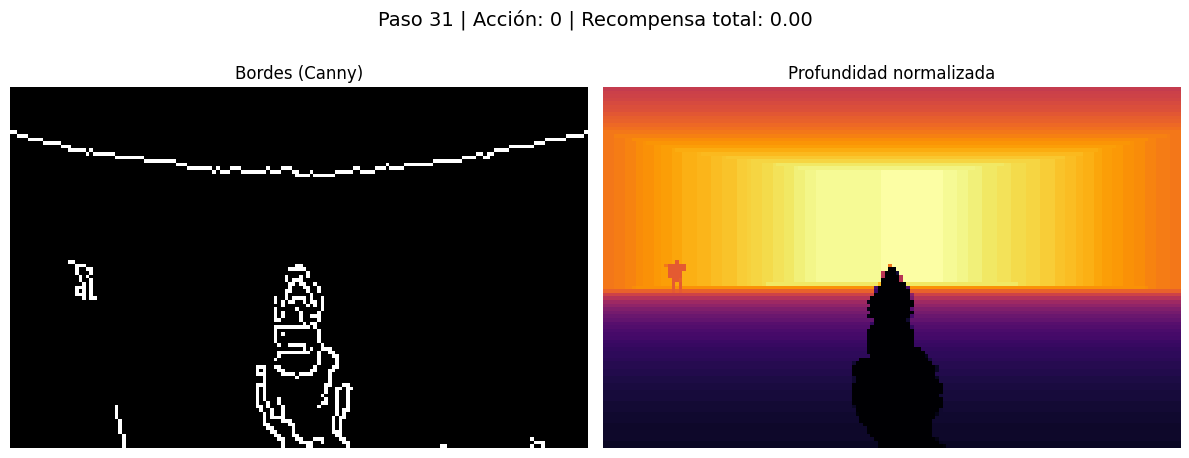

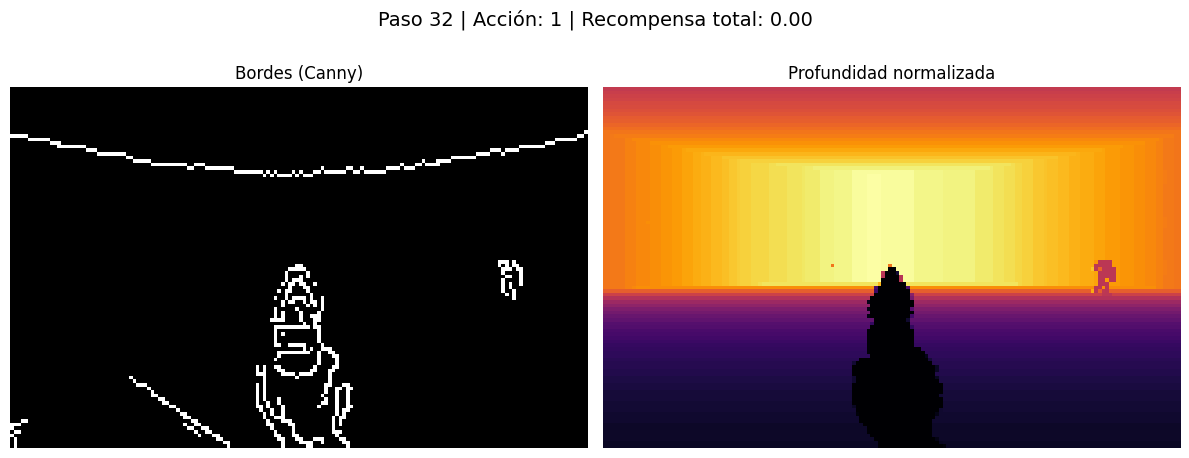

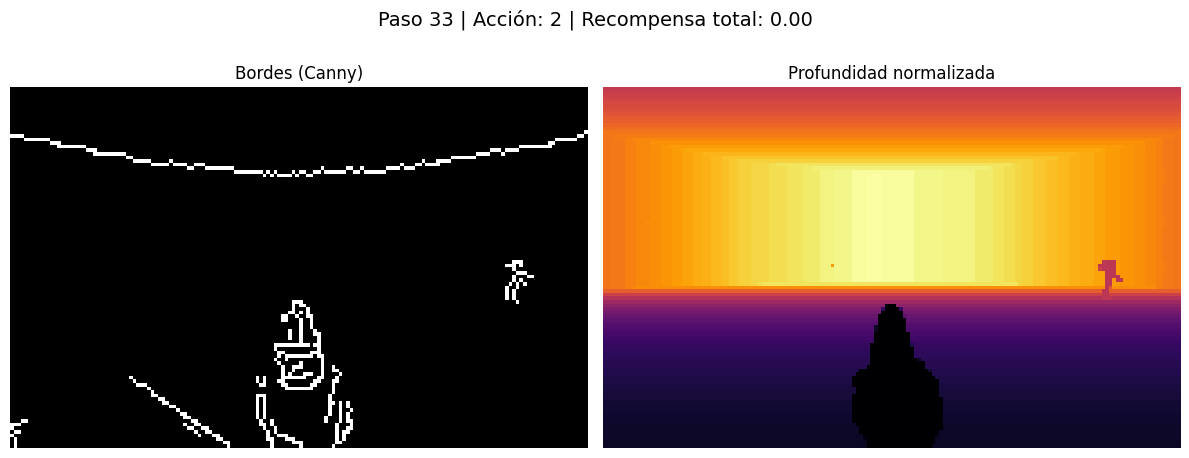

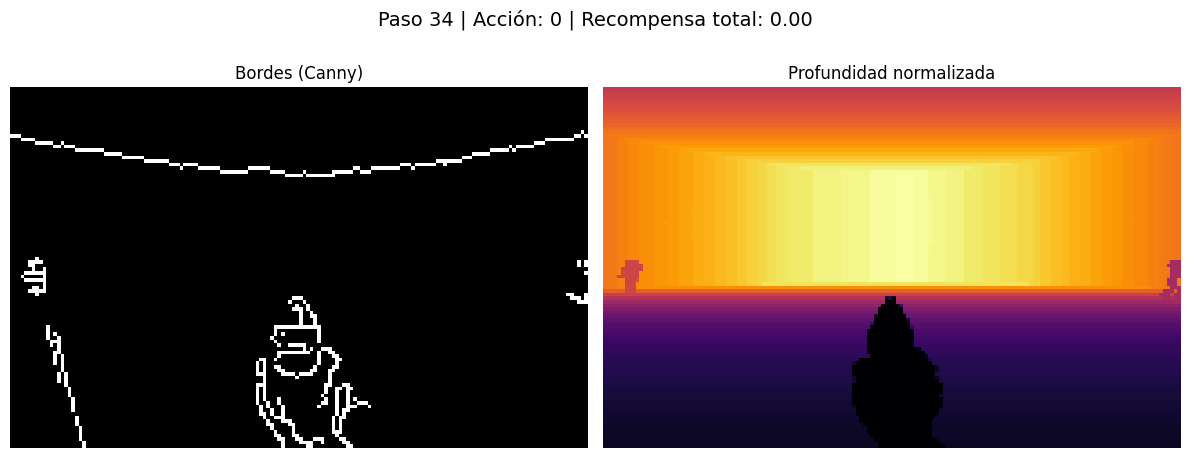

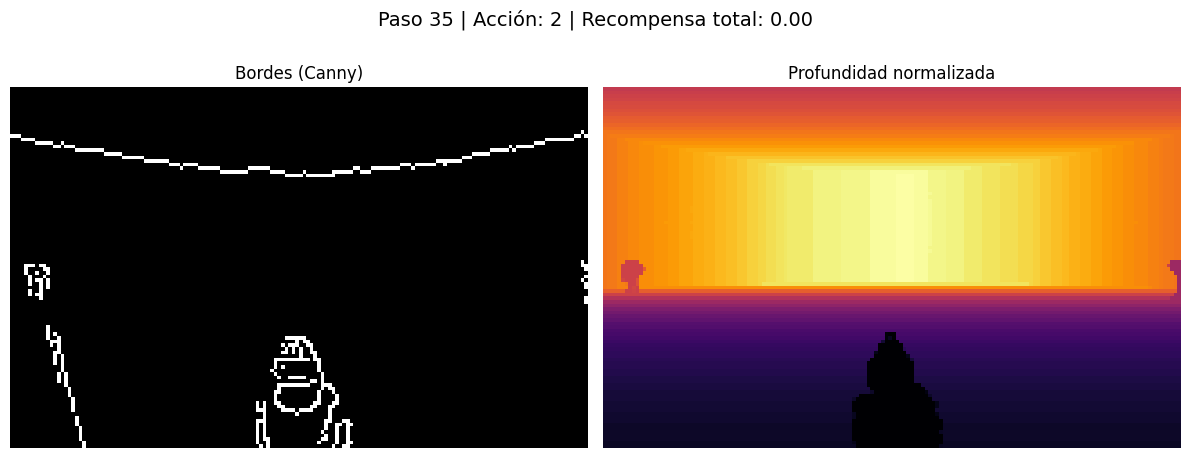

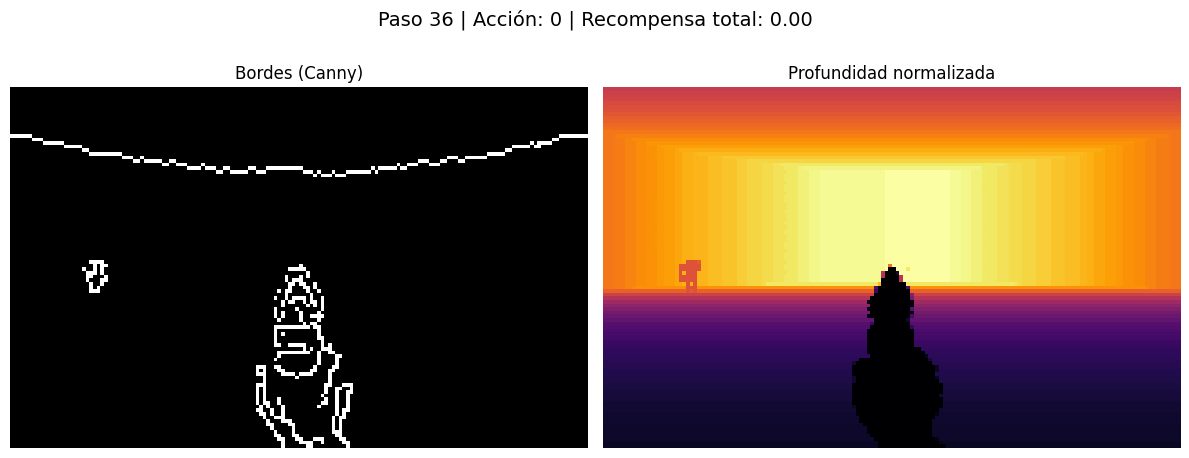

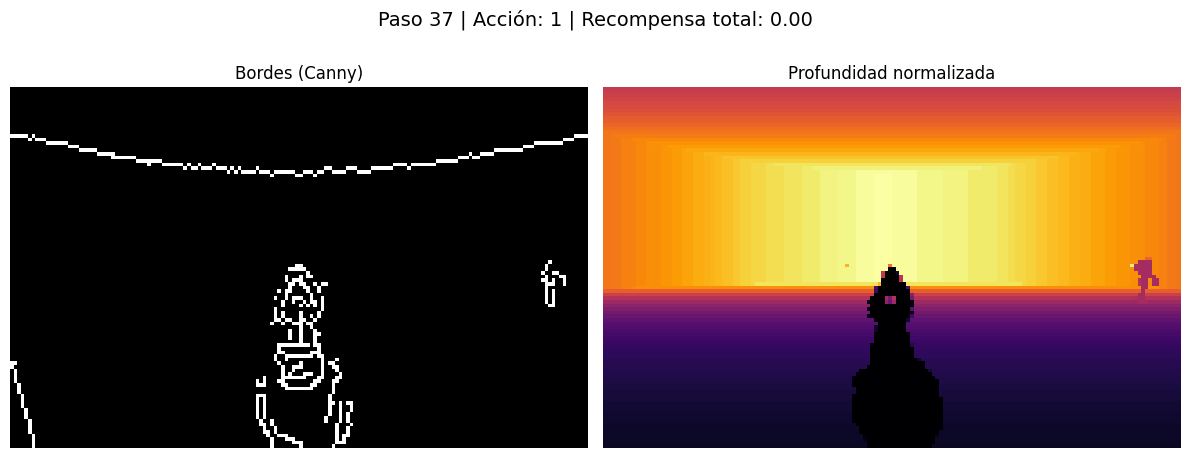

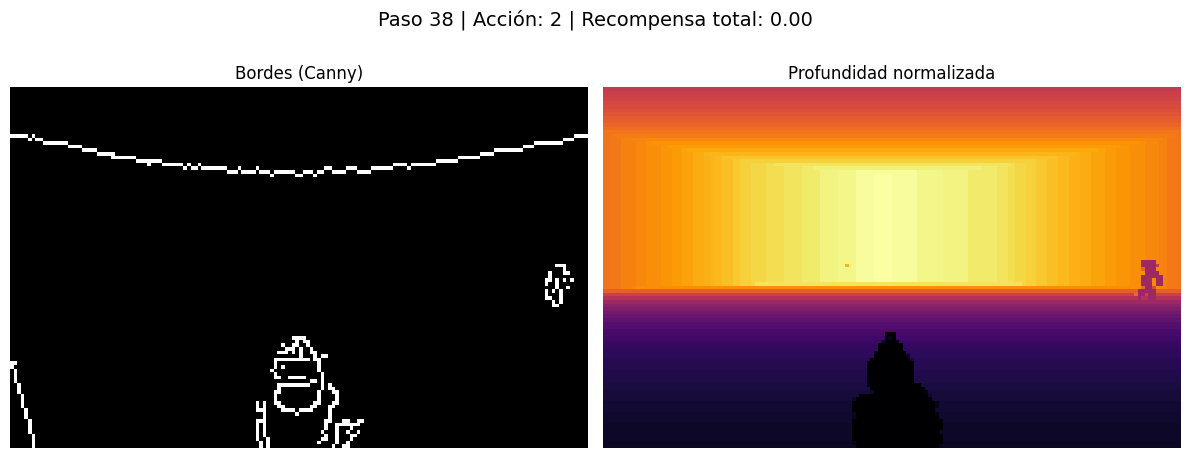

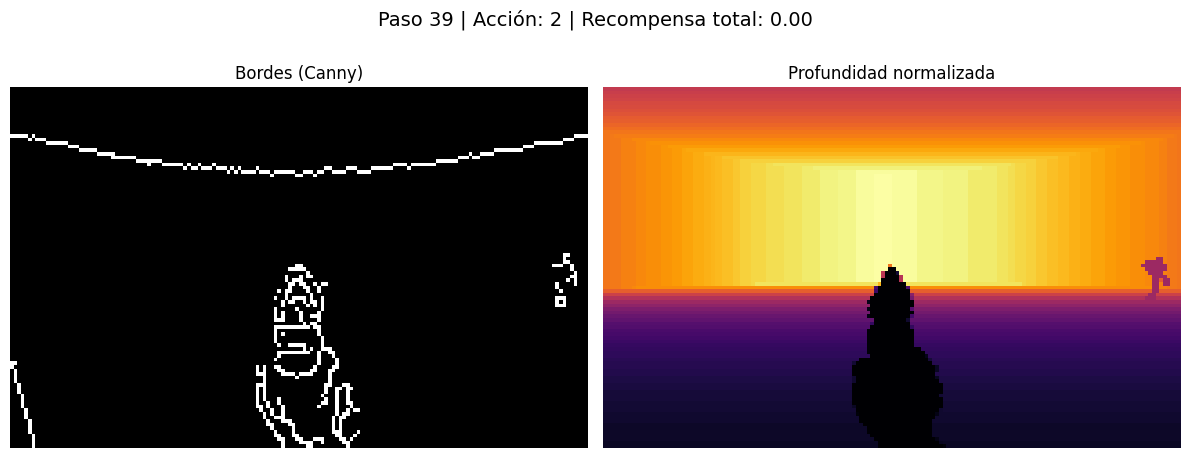

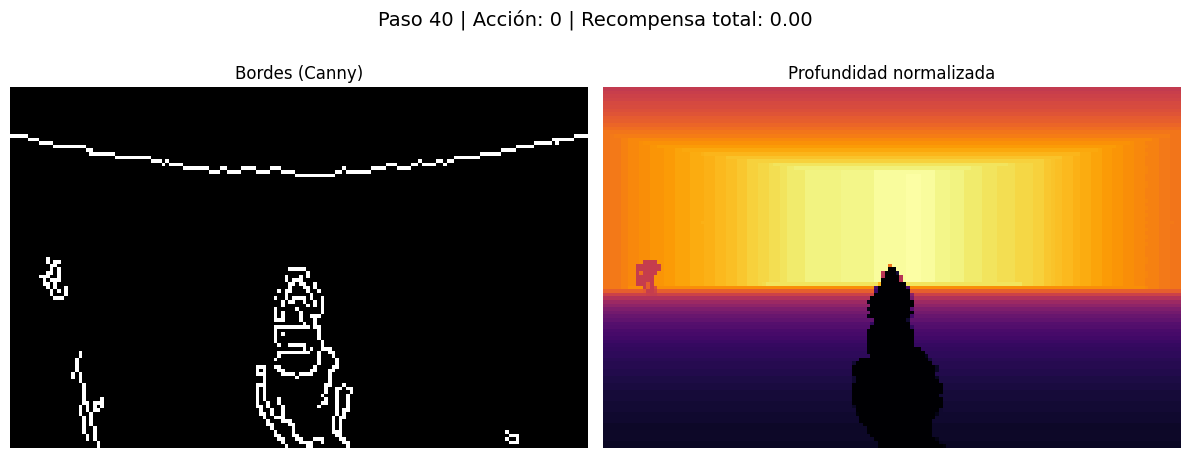

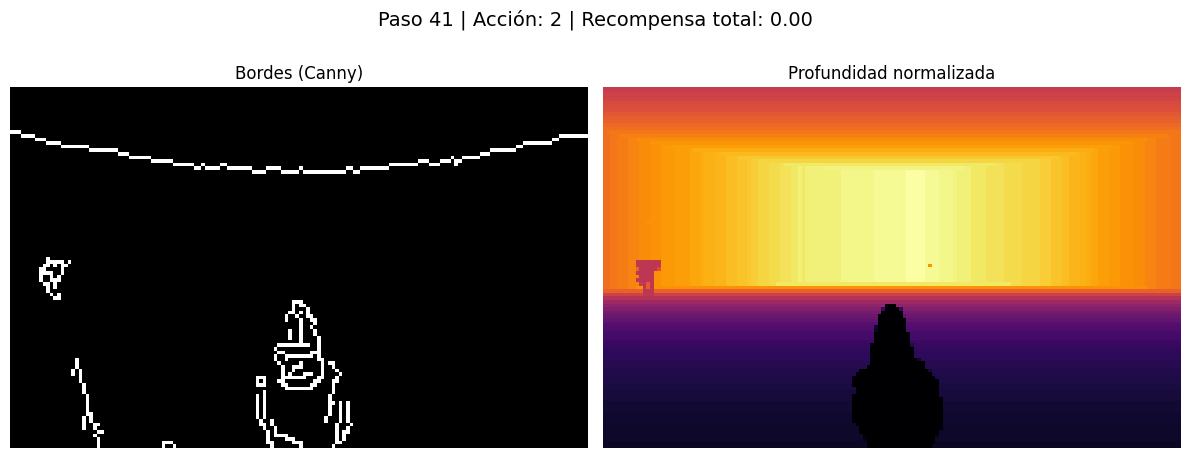

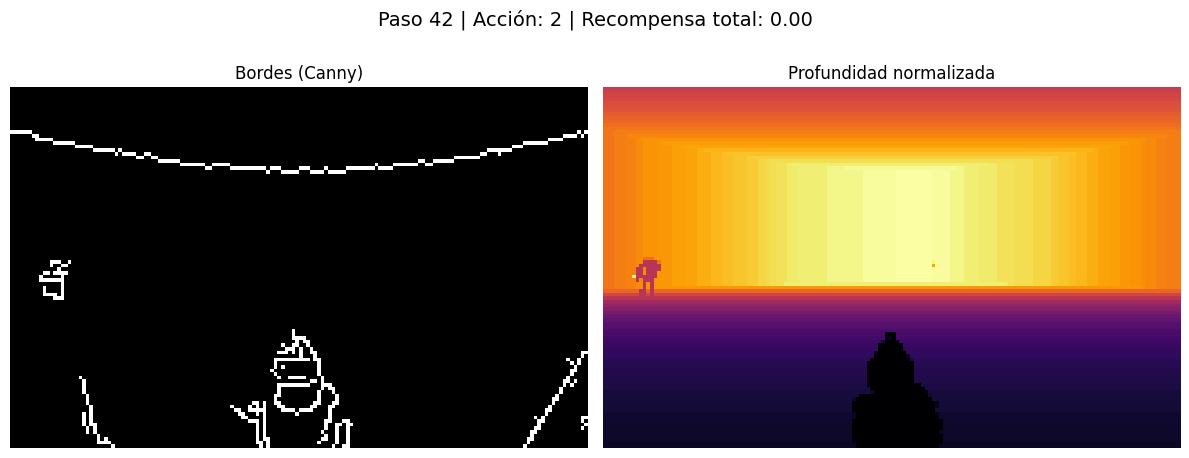

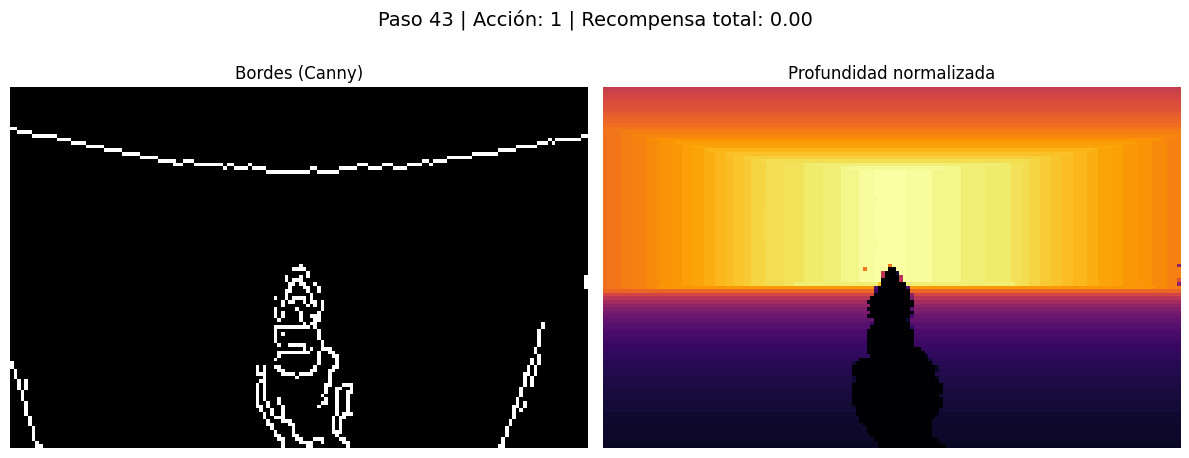

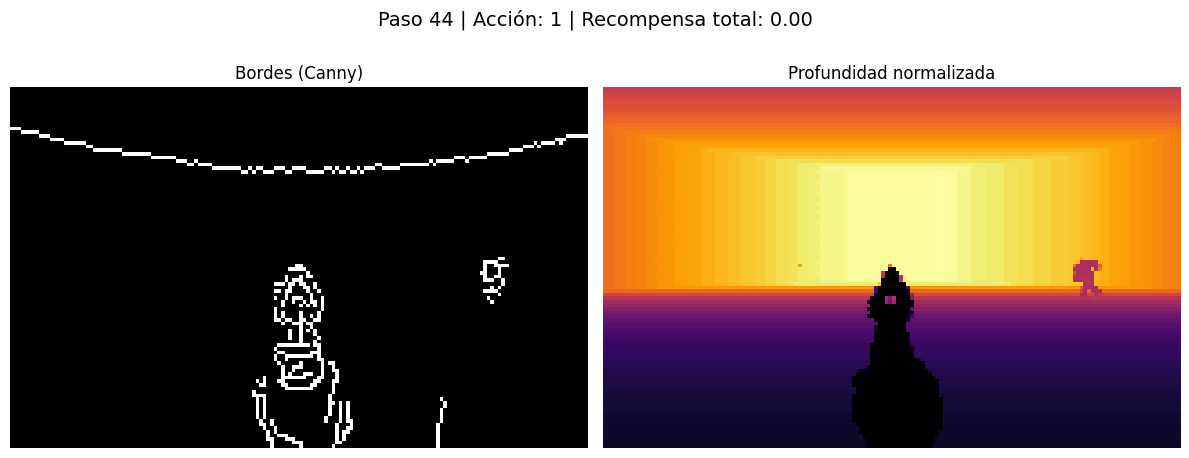

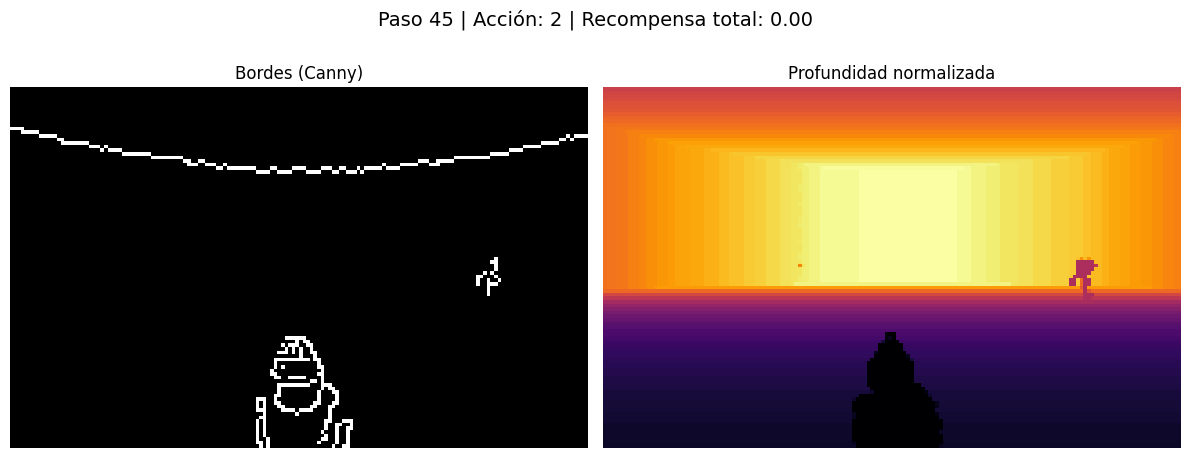

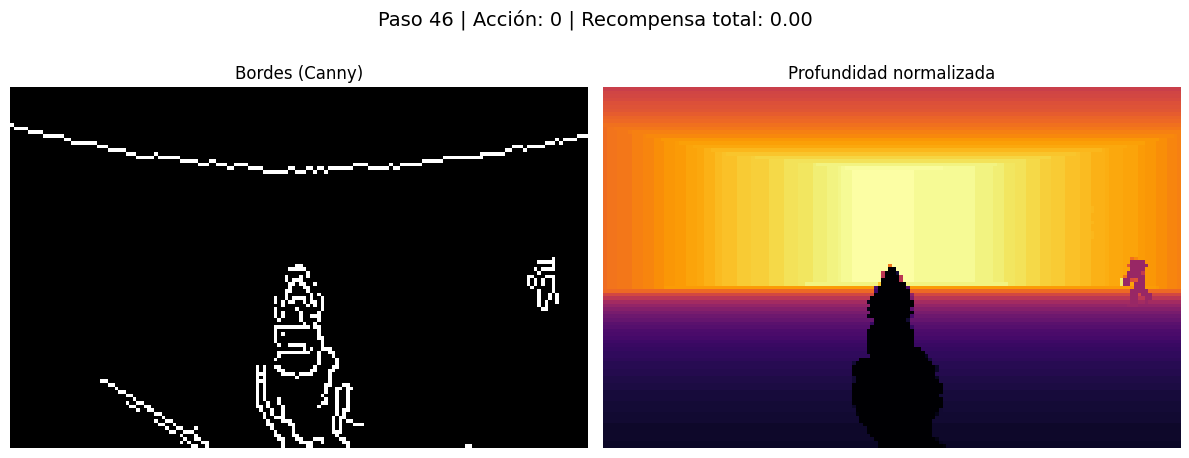

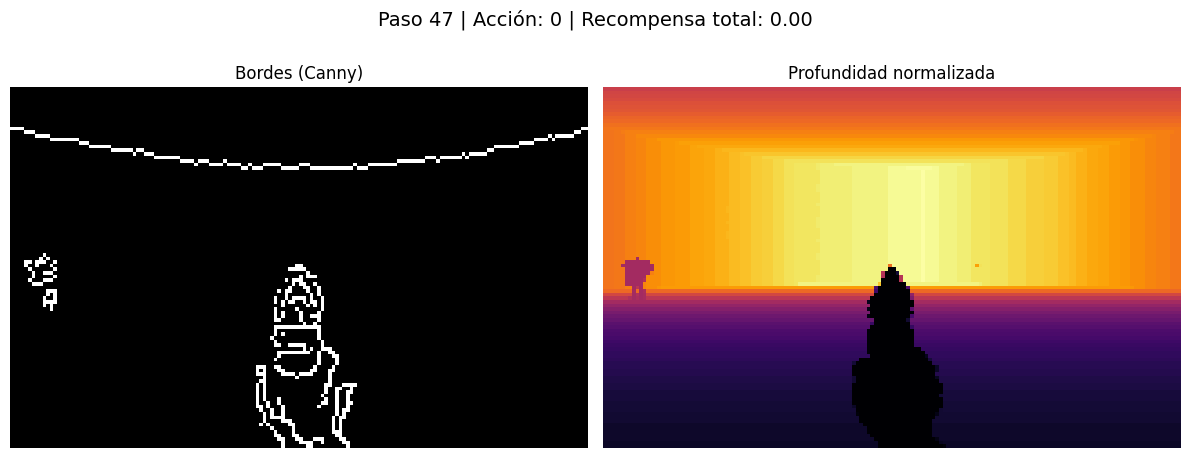

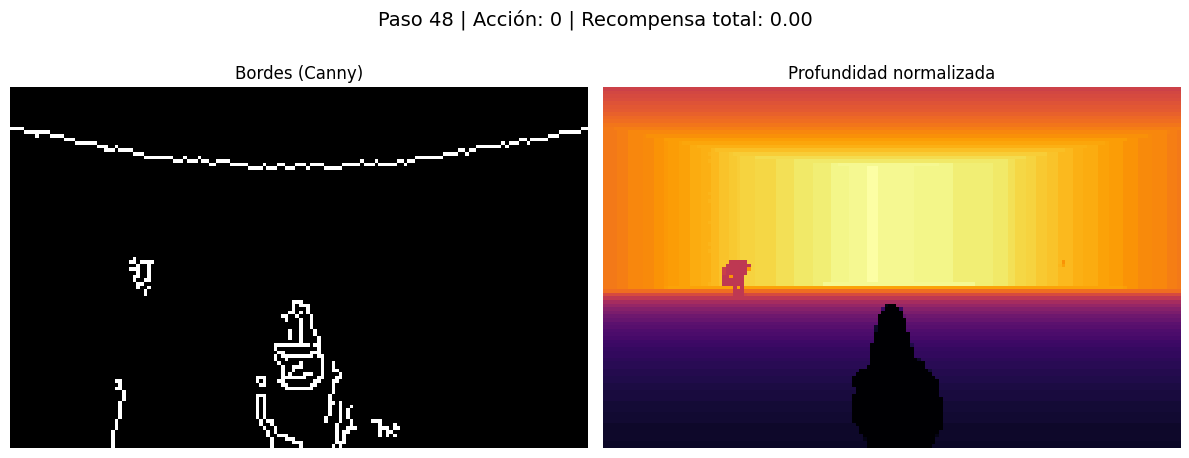

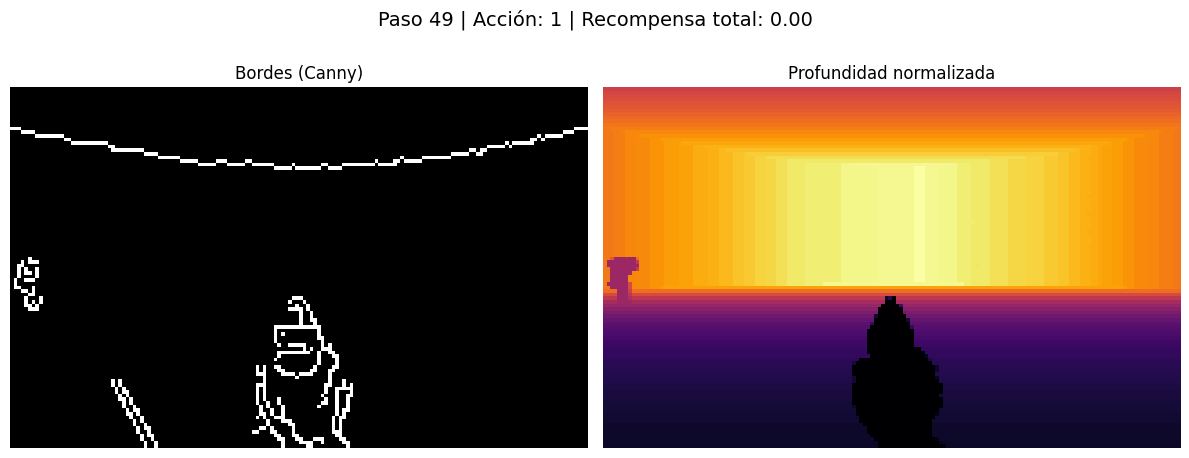

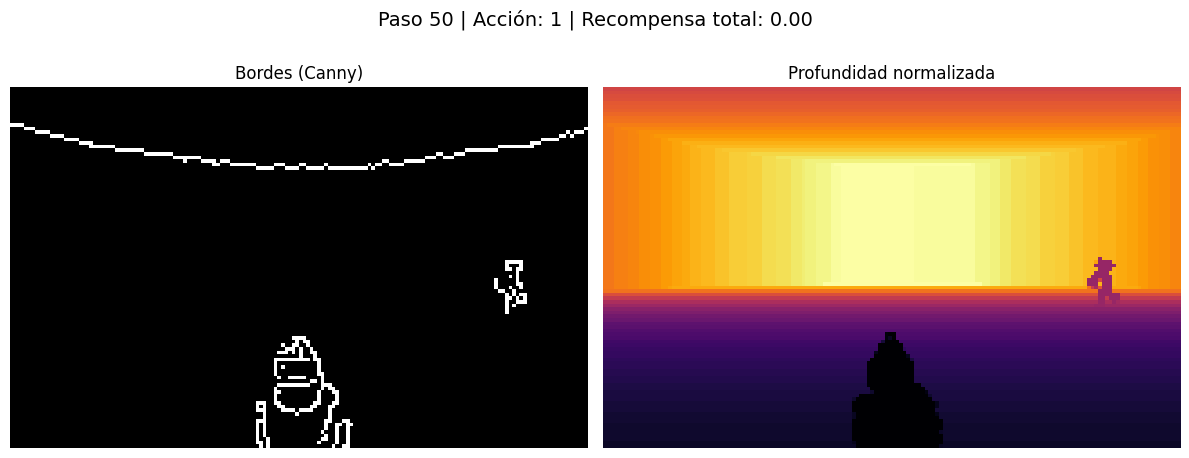

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

env = VizDoomGym(config_path=r"D:\vizdoom_rl_project\config\defend_the_center.cfg")
obs = env.reset()

total_actions = 50
frame_skip = 4

for step in range(total_actions):
    action = np.random.randint(0, 3)
    reward_total = 0
    done = False

    # Ejecutar la misma acción 4 veces (frame_skip)
    for i in range(frame_skip):
        obs, reward, done, info = env.step(action)
        reward_total += reward
        if done:
            break

    # Separar canales
    edges = obs[:, :, 0]
    depth = obs[:, :, 1]

    # Mostrar nueva figura para esta acción
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].imshow(edges, cmap='gray')
    axs[0].set_title("Bordes (Canny)")
    axs[0].axis('off')

    axs[1].imshow(depth, cmap='inferno')
    axs[1].set_title("Profundidad normalizada")
    axs[1].axis('off')

    fig.suptitle(f"Paso {step+1} | Acción: {action} | Recompensa total: {reward_total:.2f}", fontsize=14)
    plt.tight_layout()
    plt.show()

    if done:
        print(" Episodio terminado")
        break

env.close()


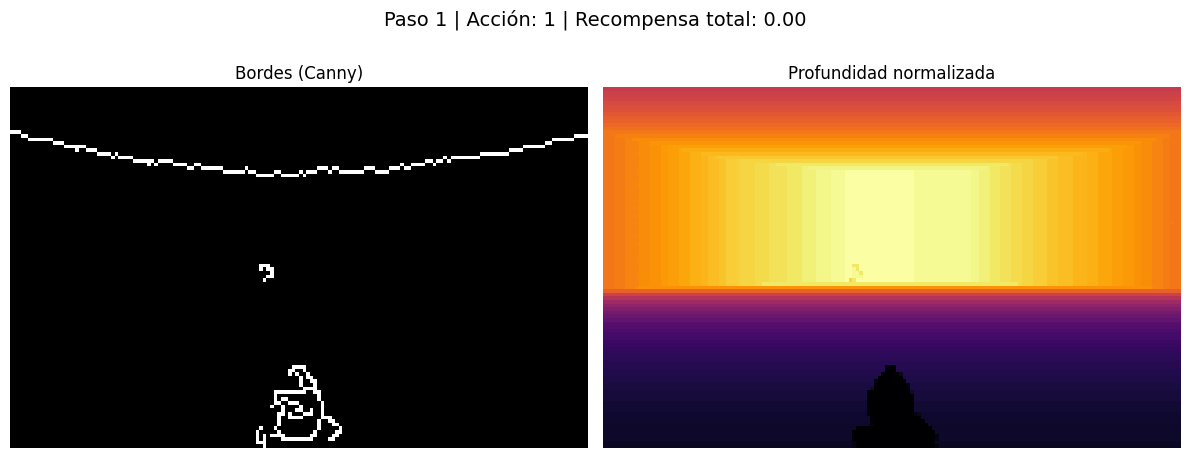

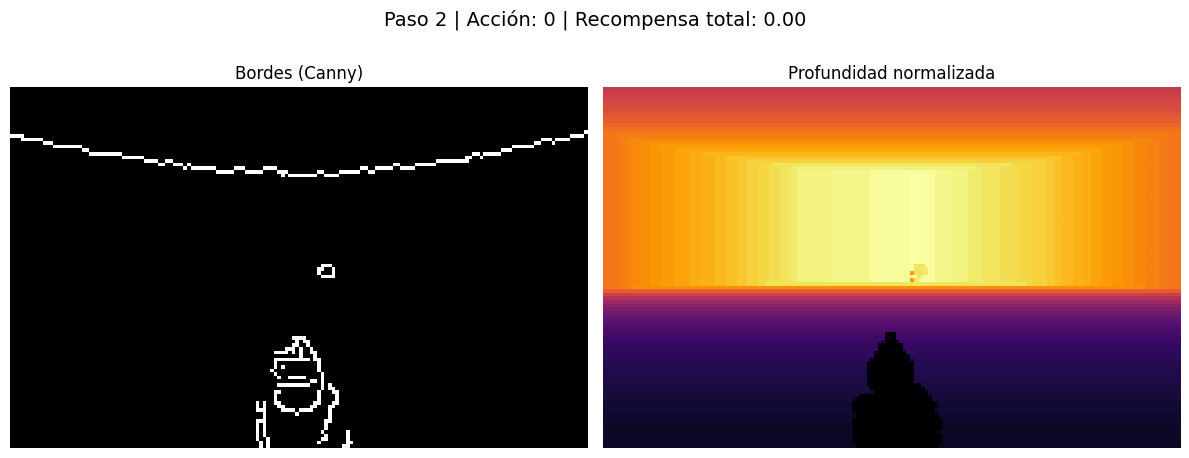

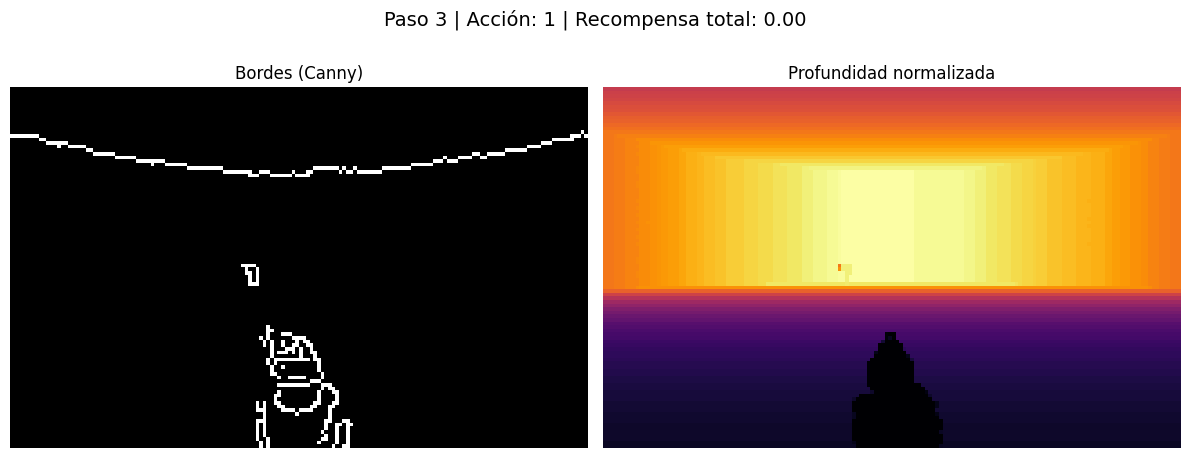

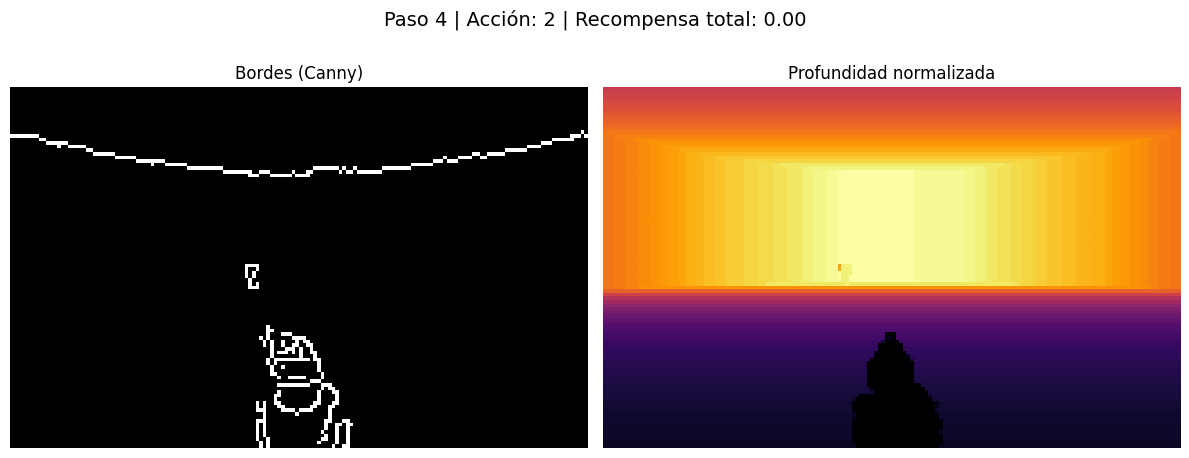

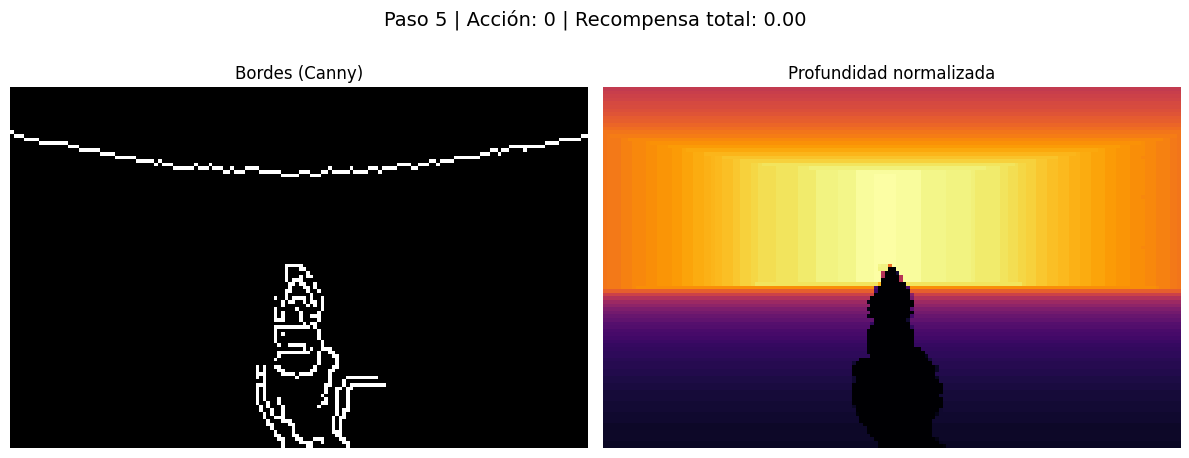

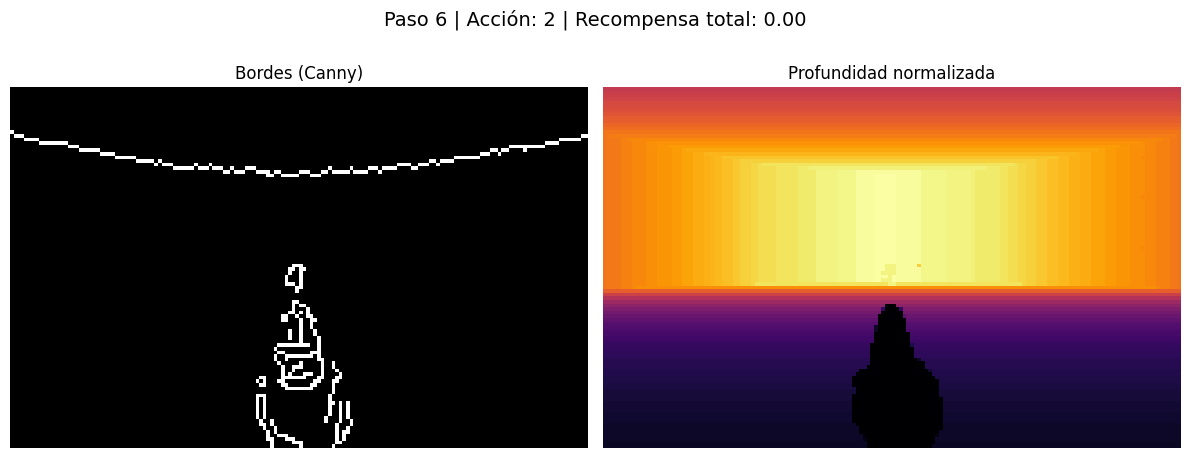

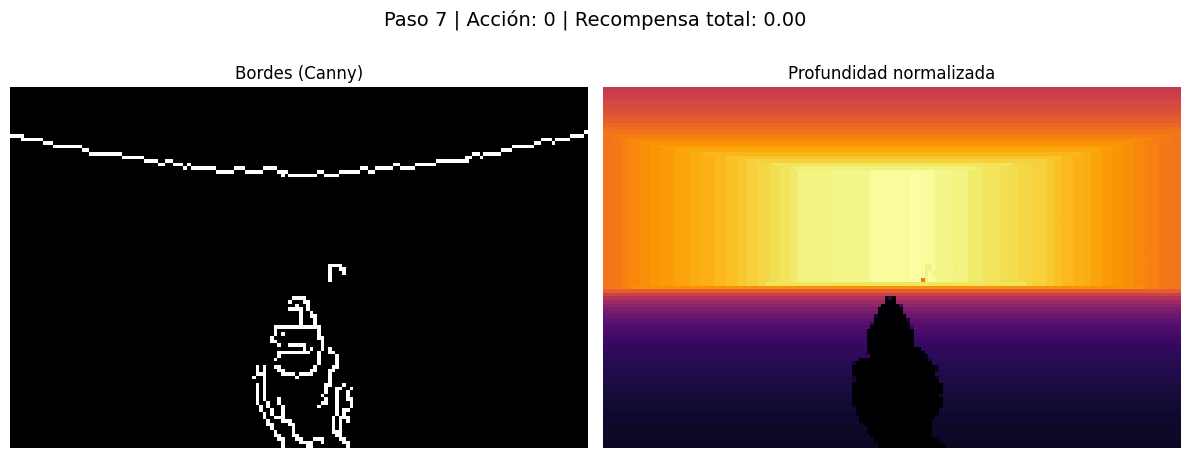

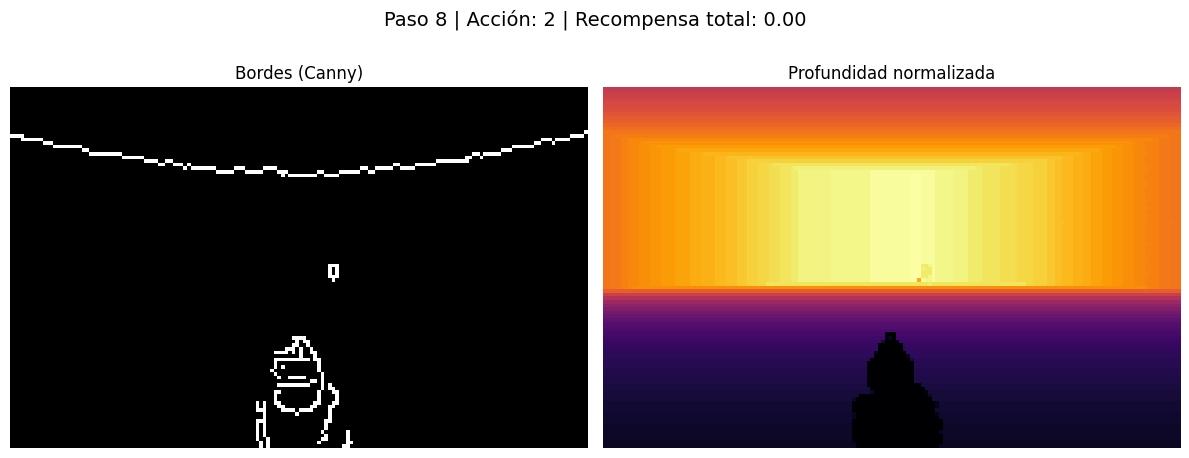

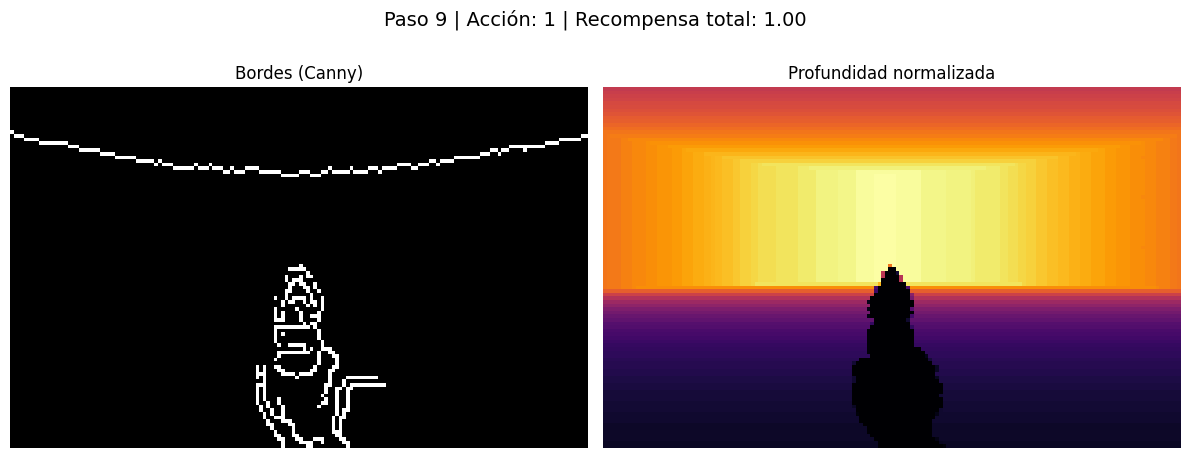

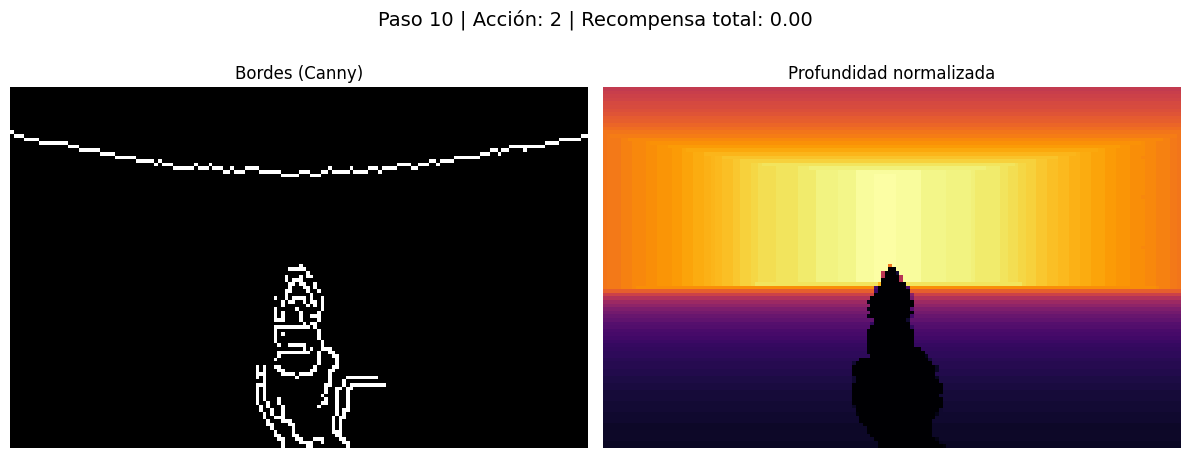

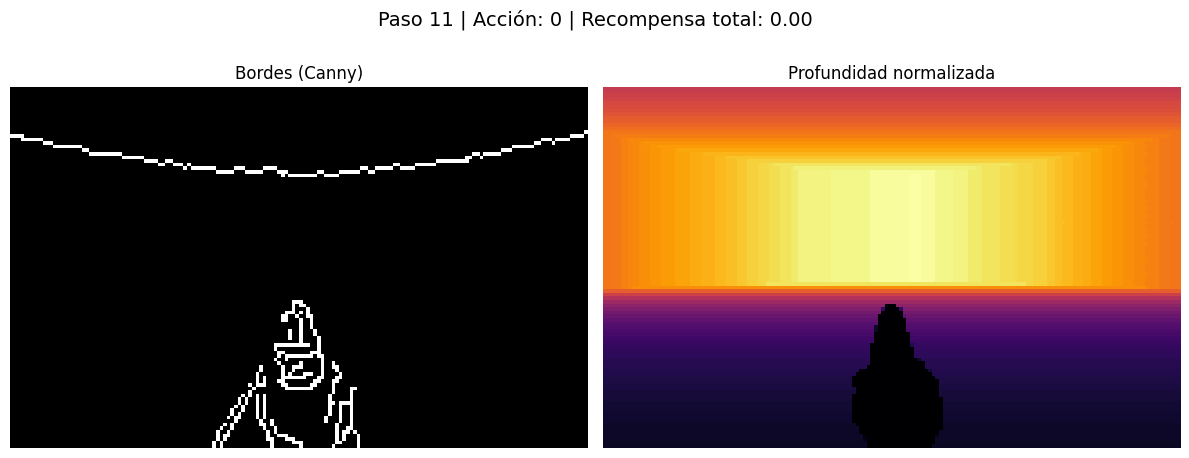

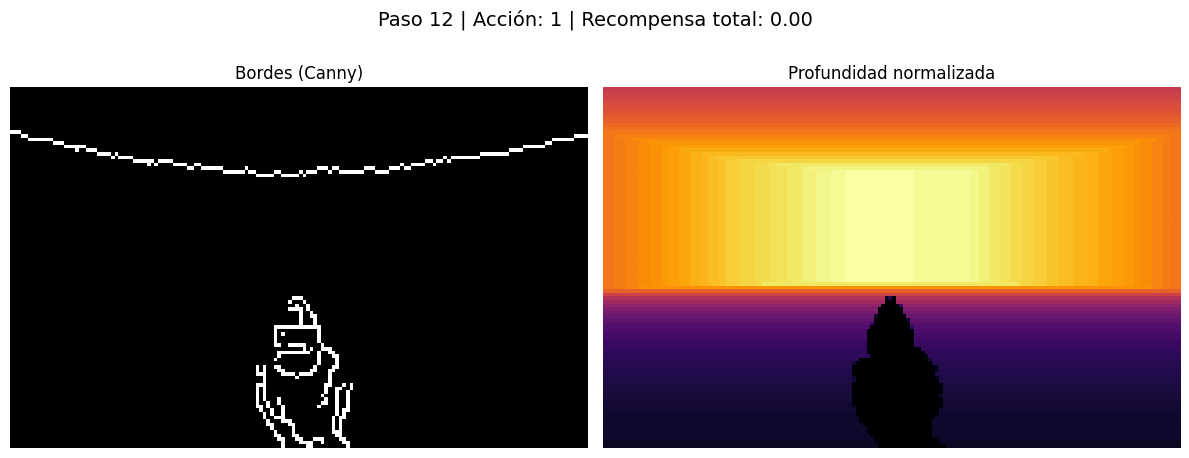

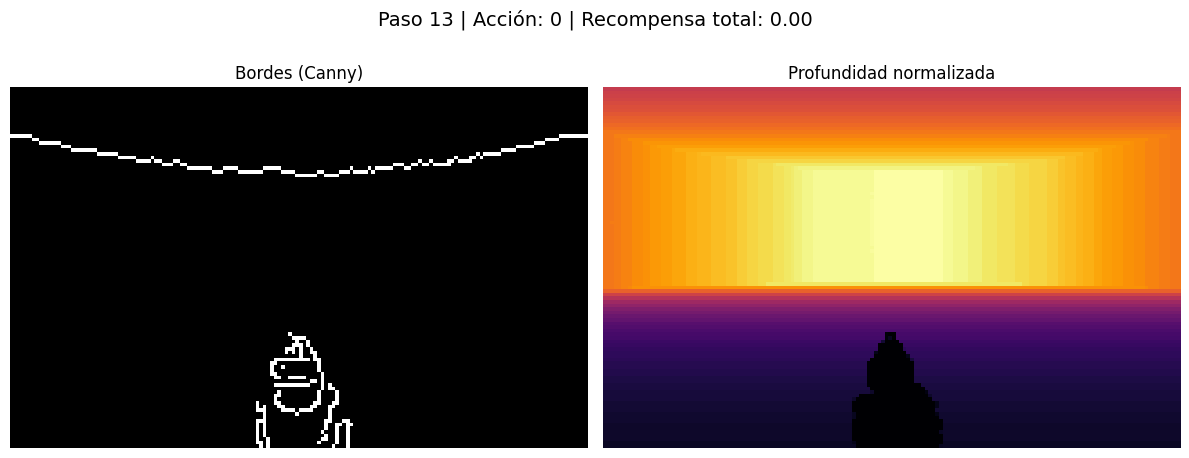

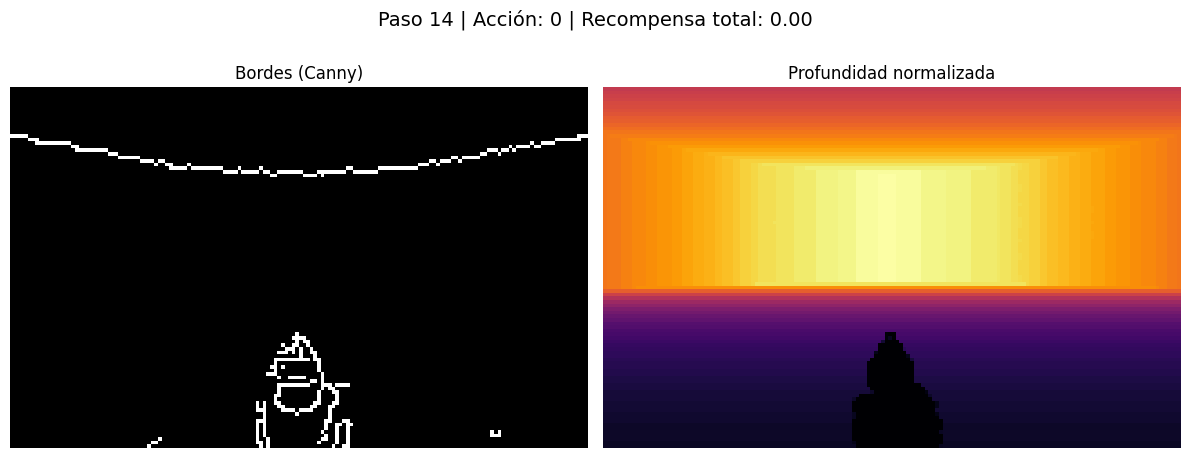

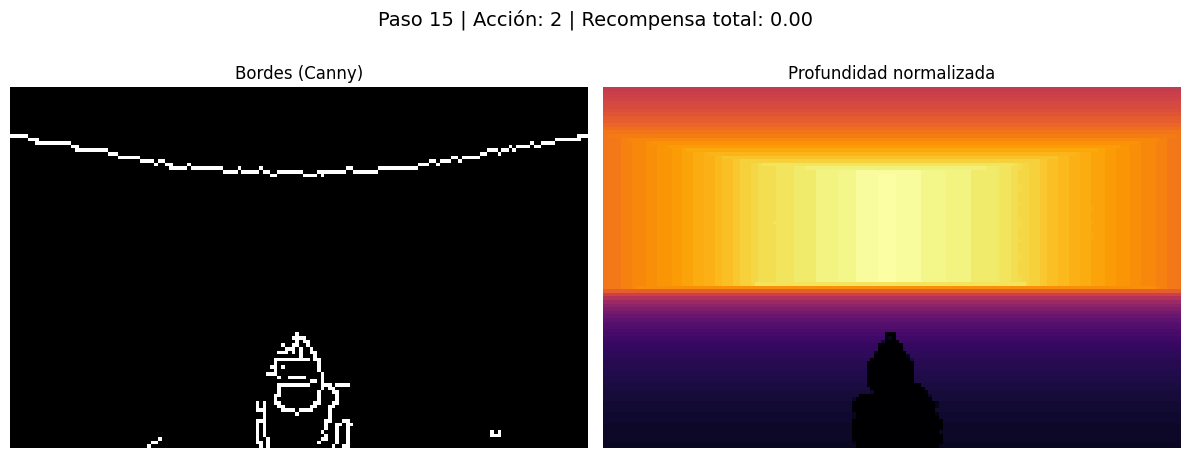

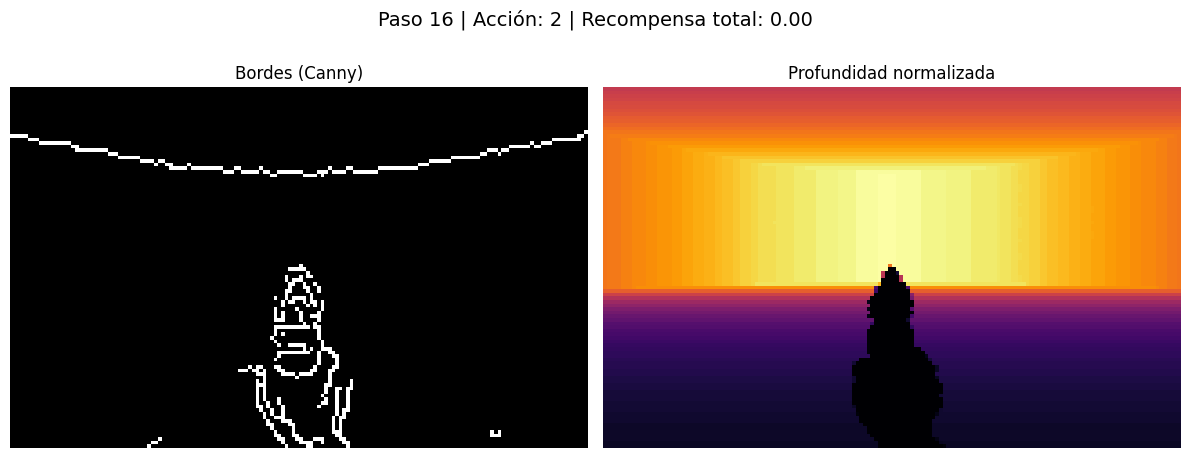

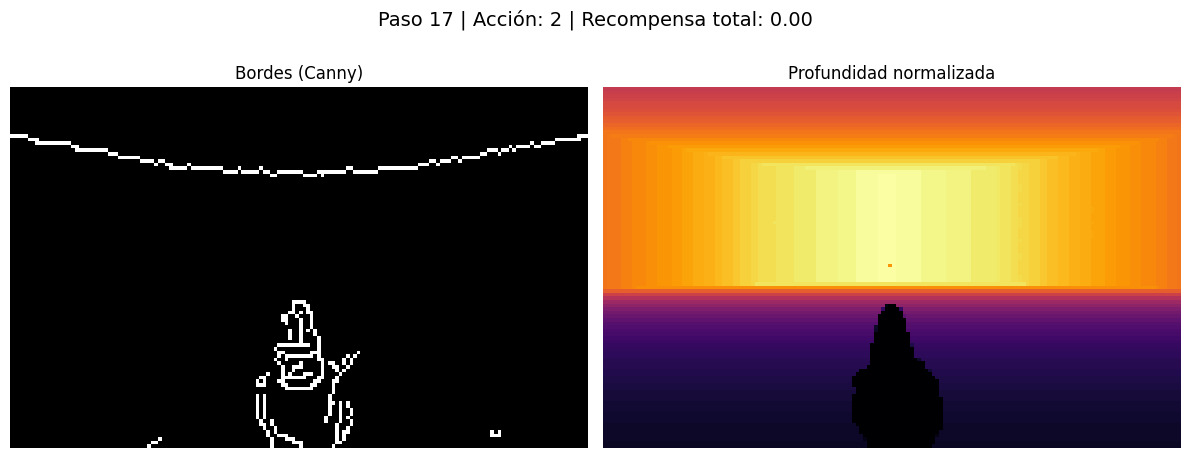

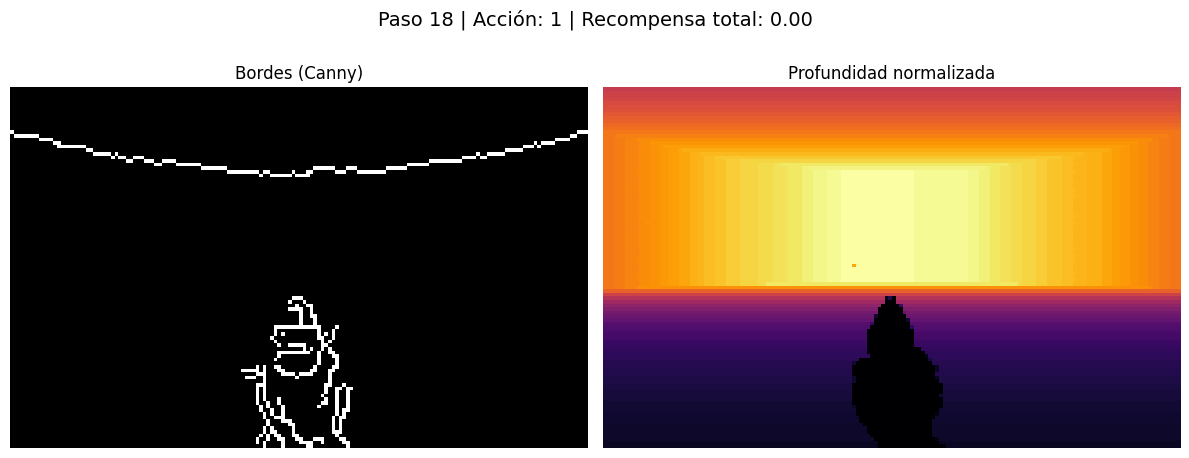

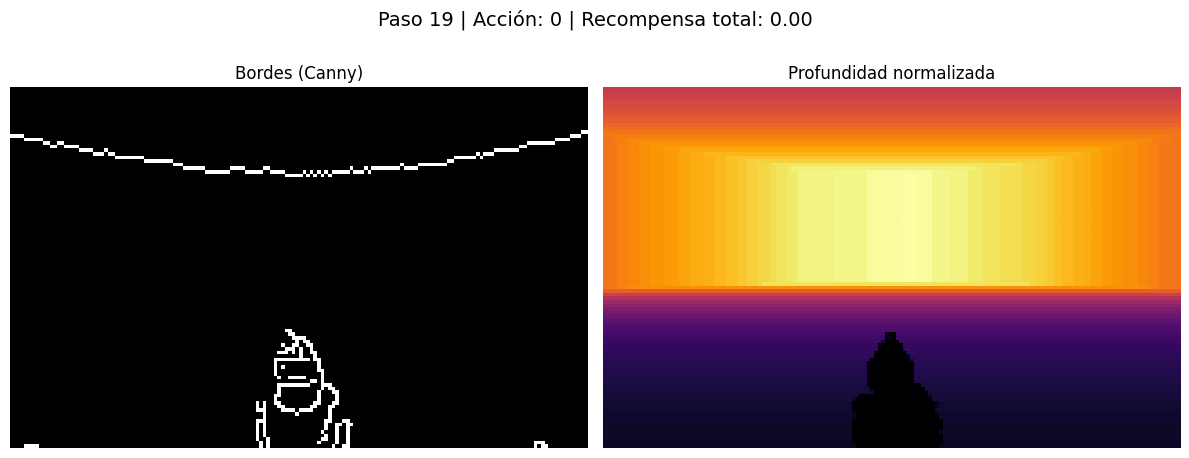

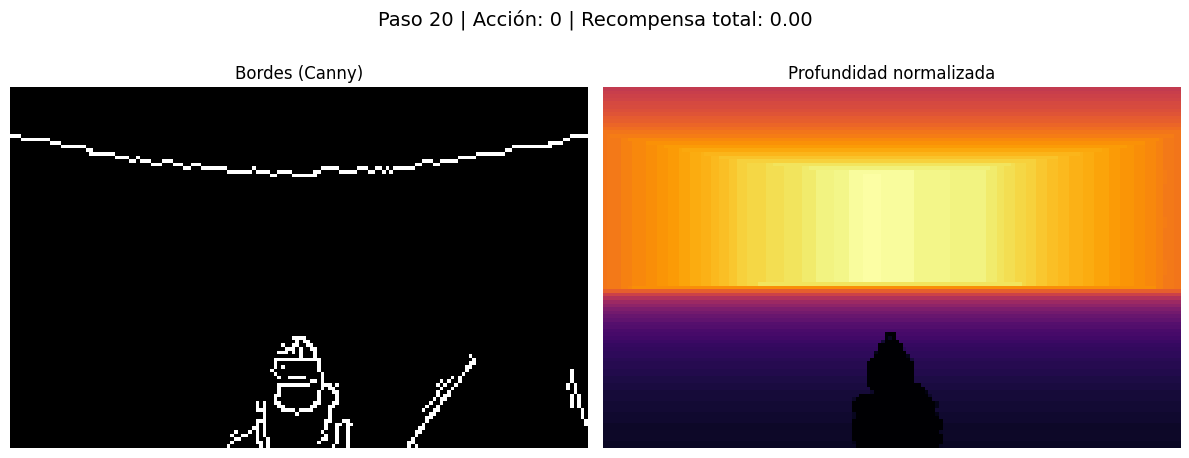

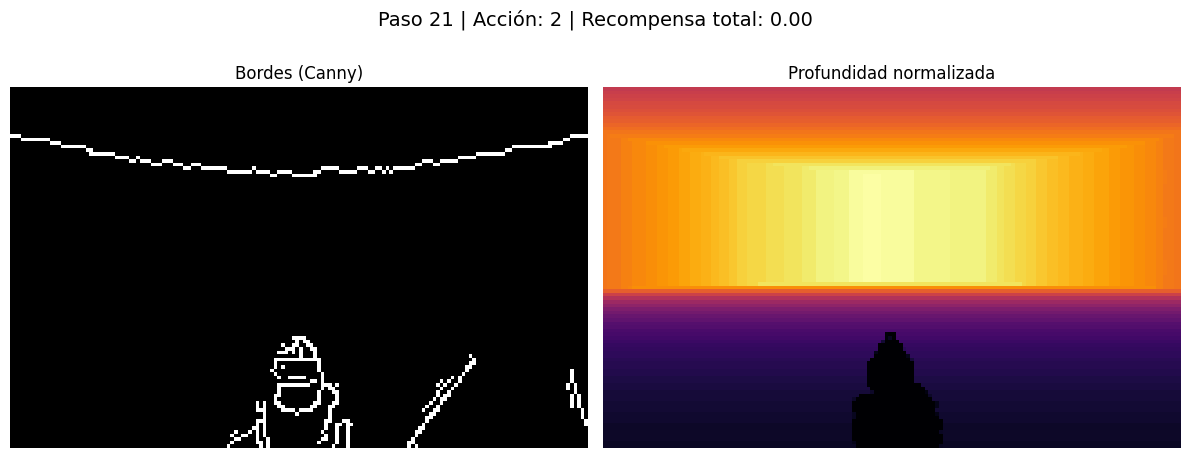

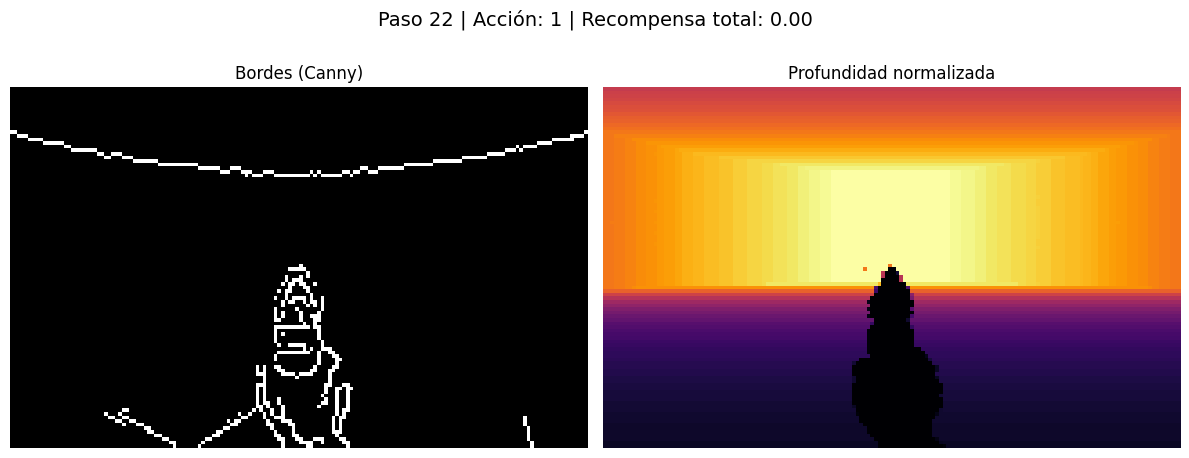

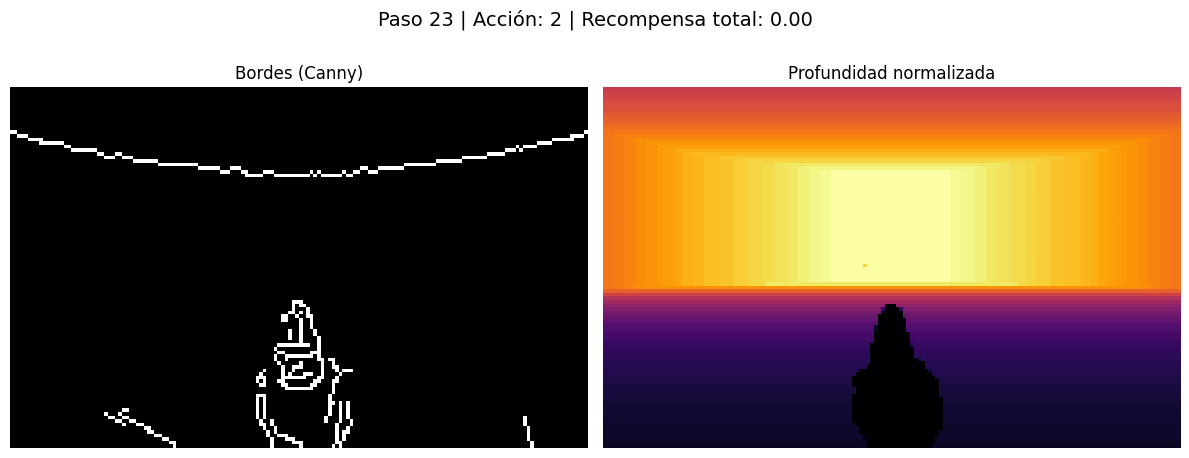

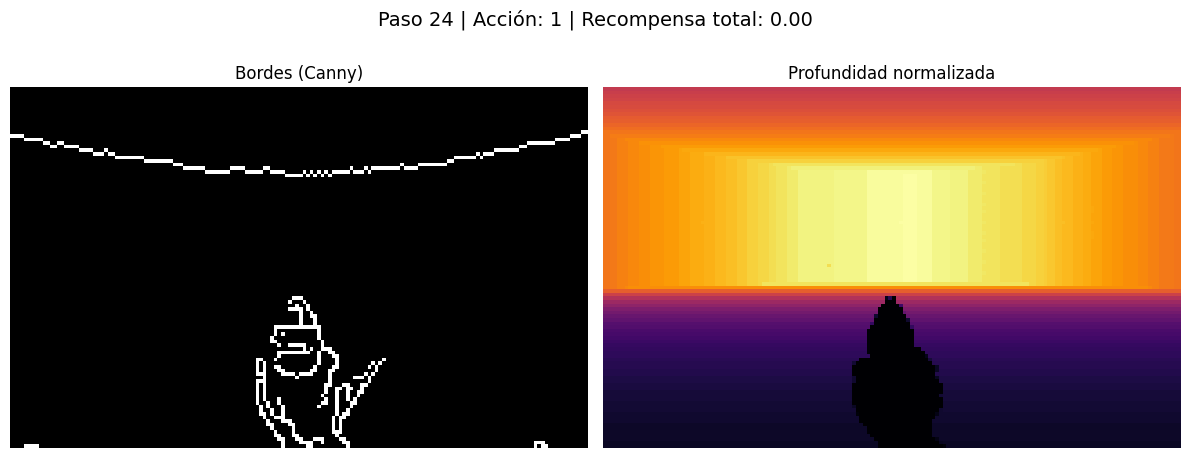

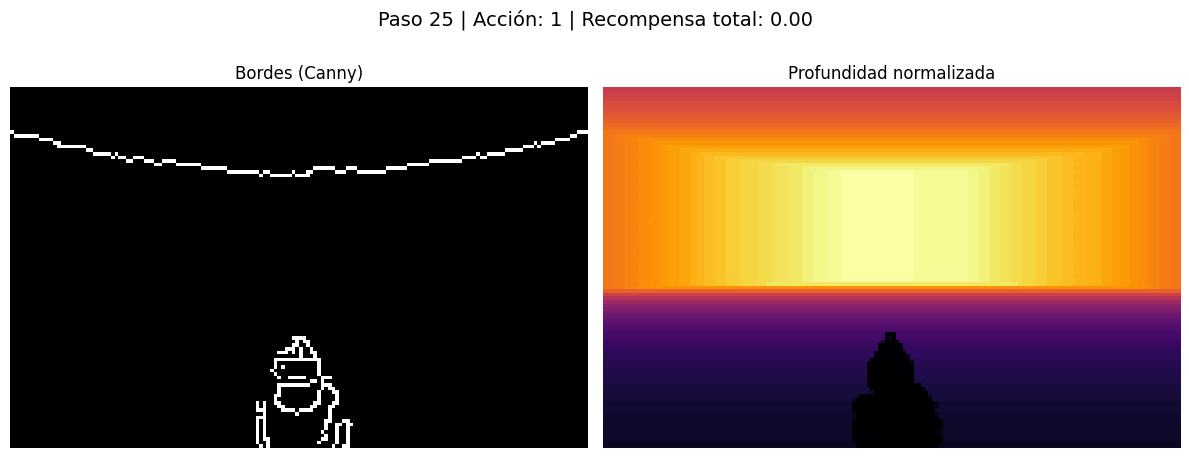

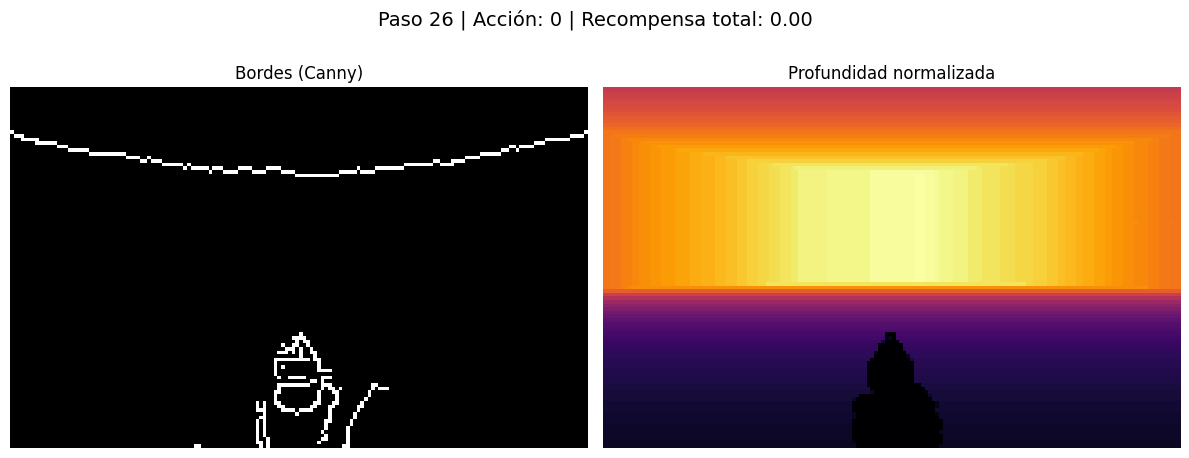

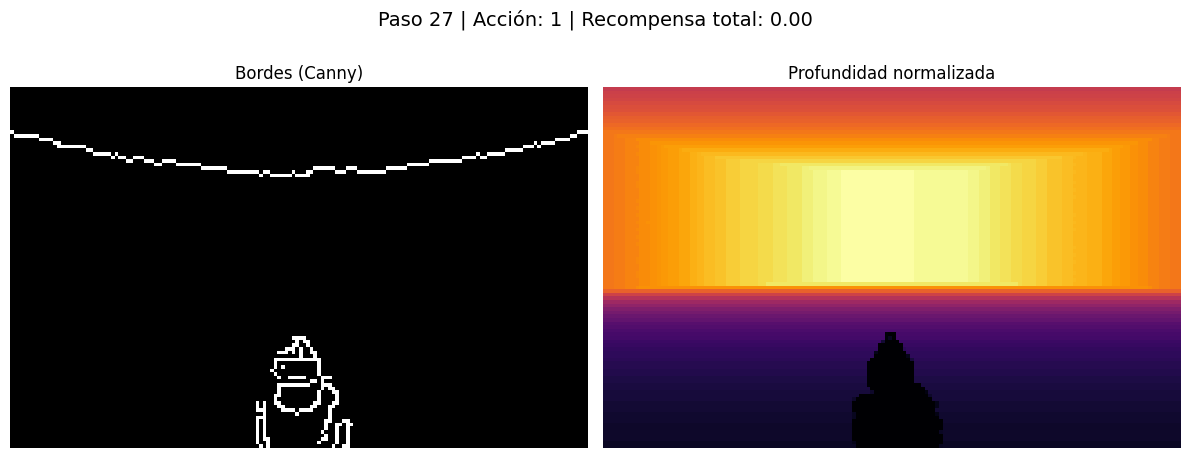

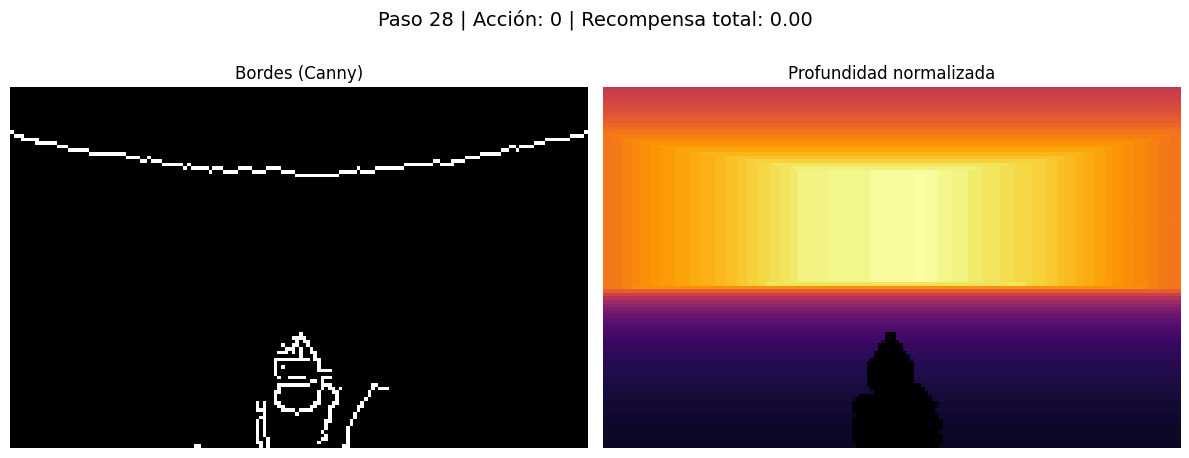

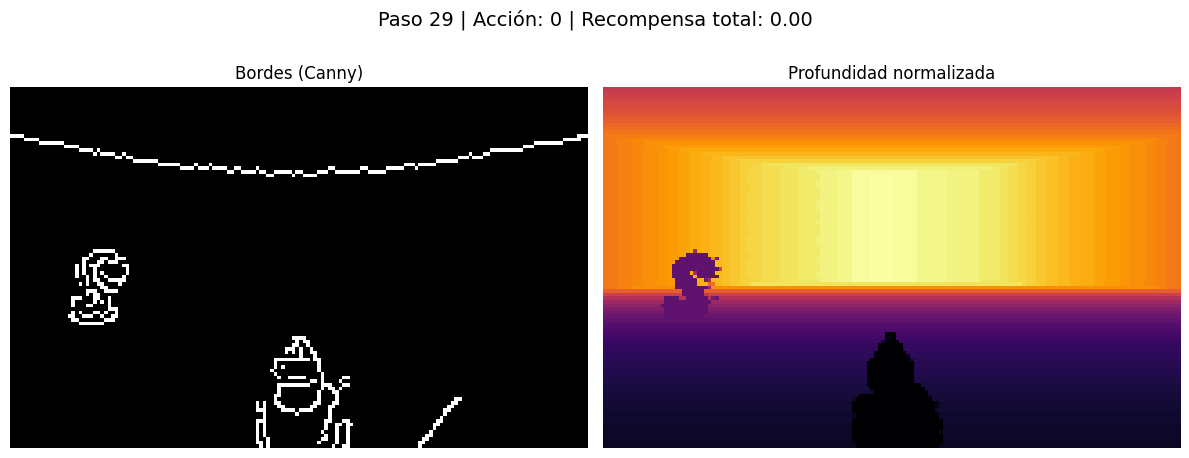

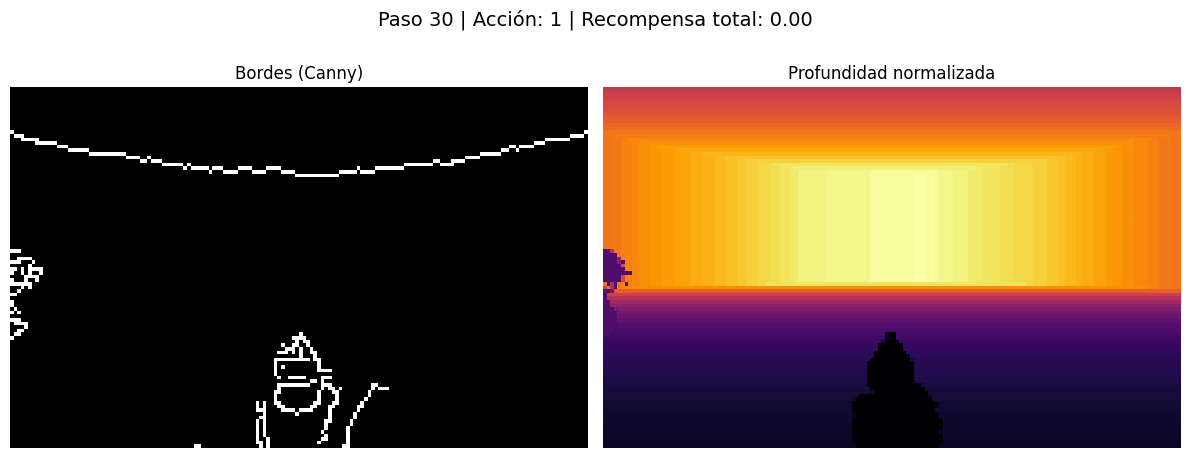

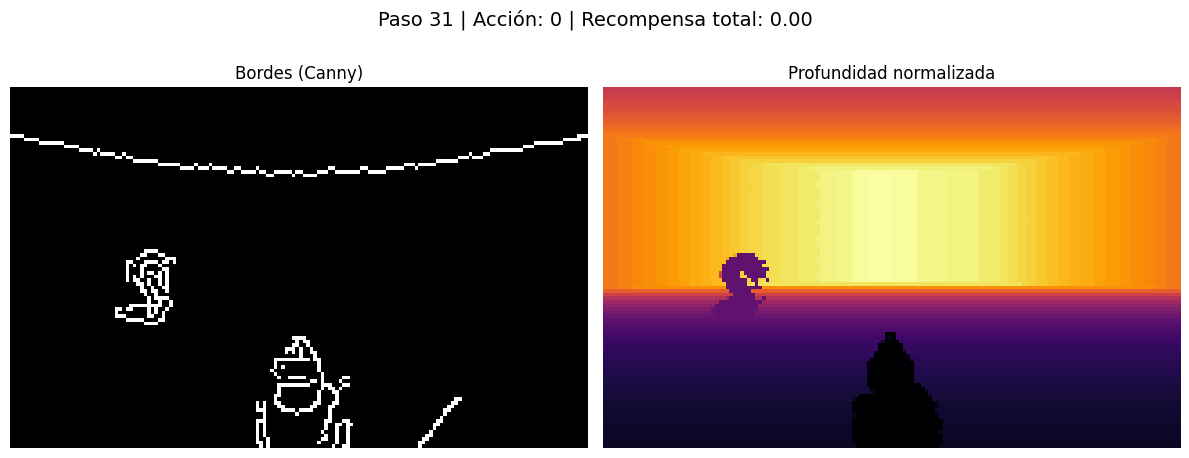

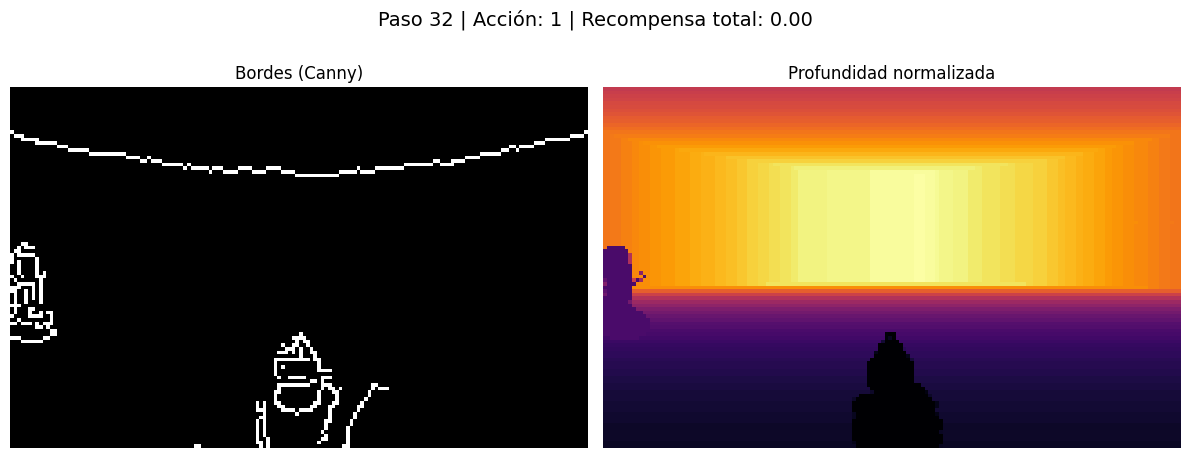

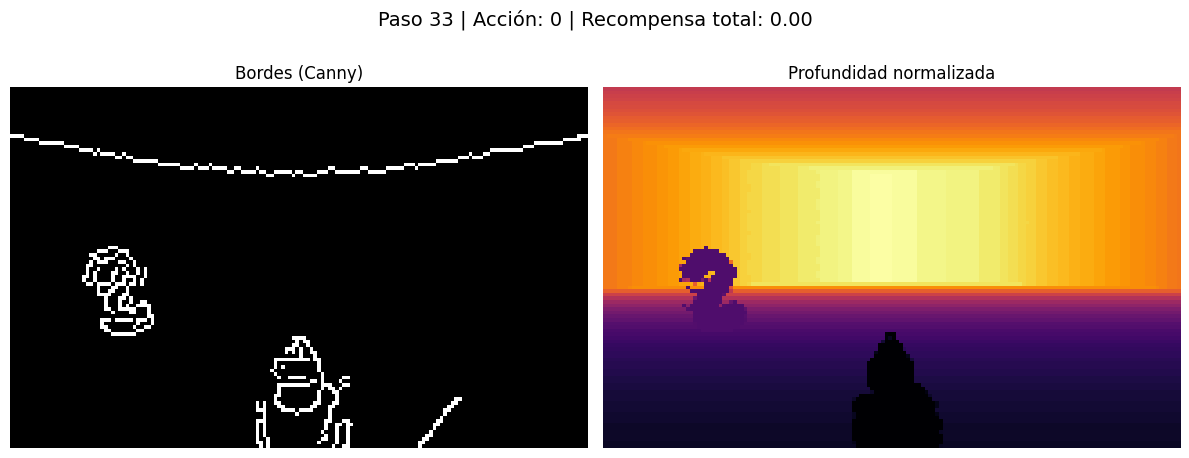

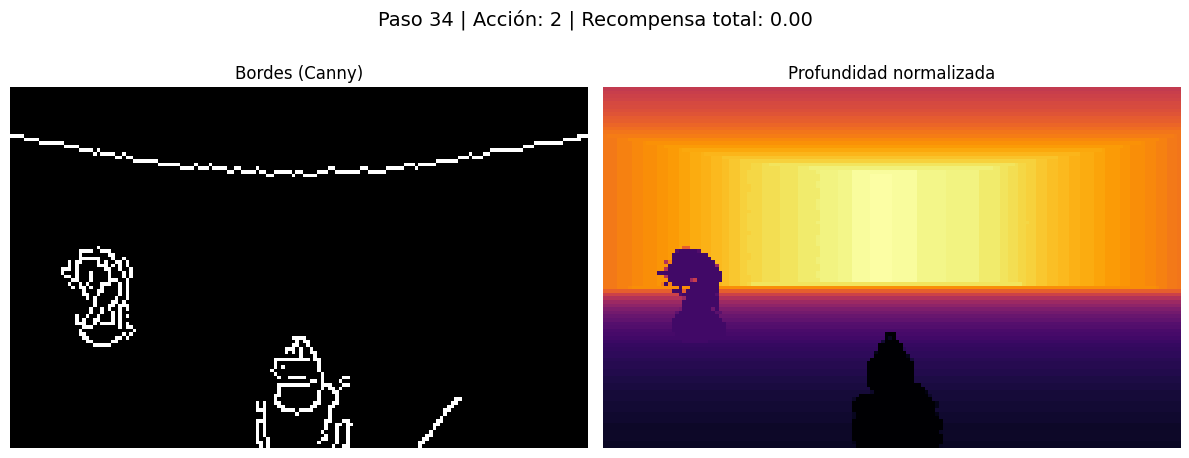

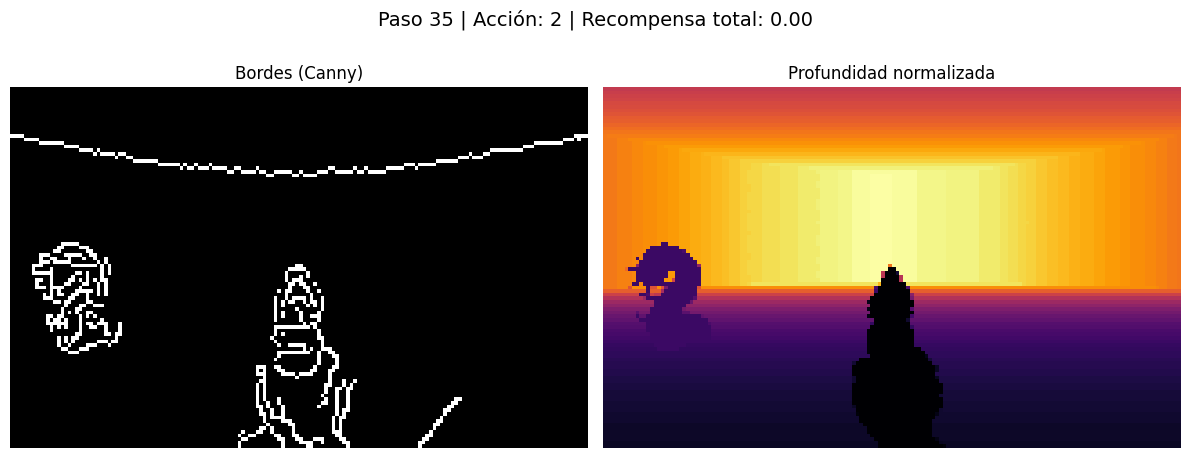

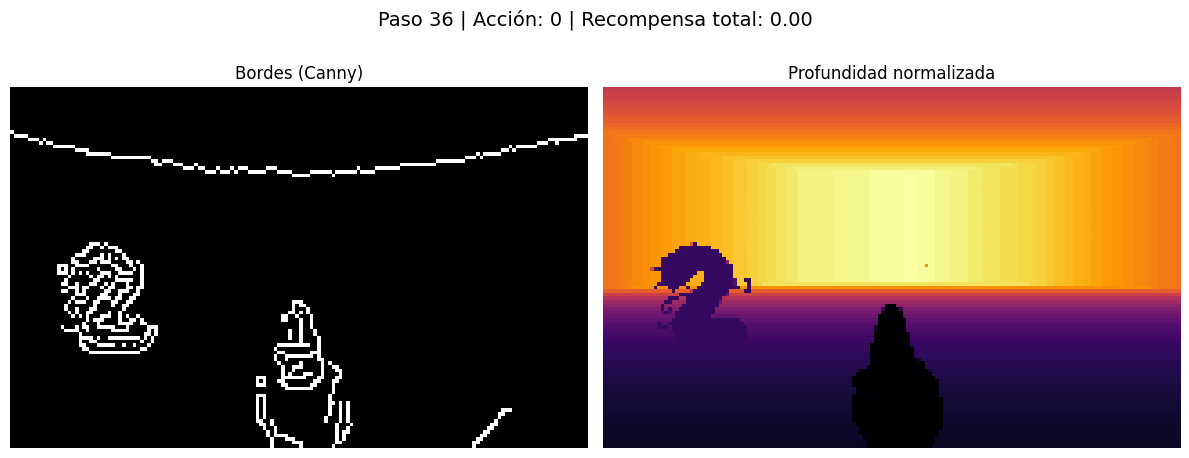

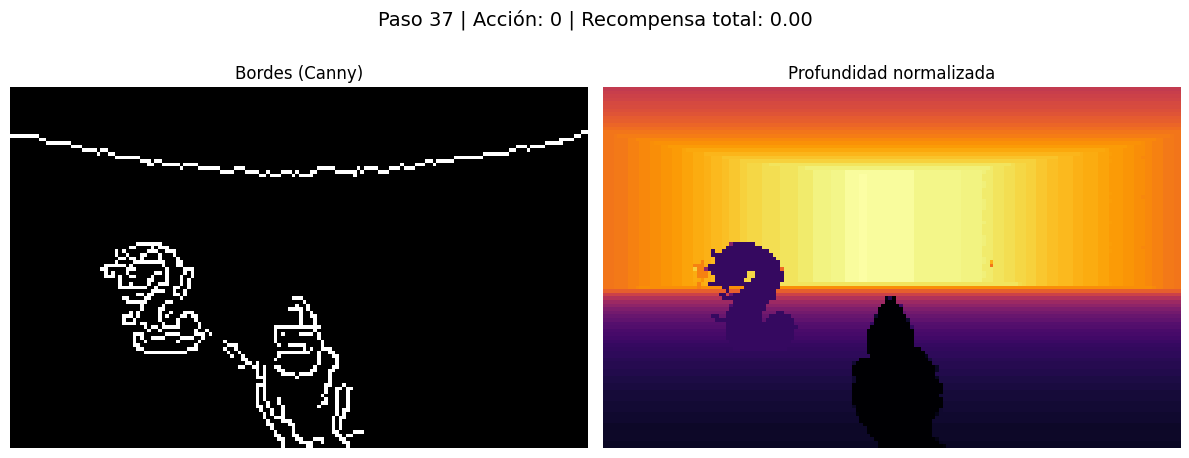

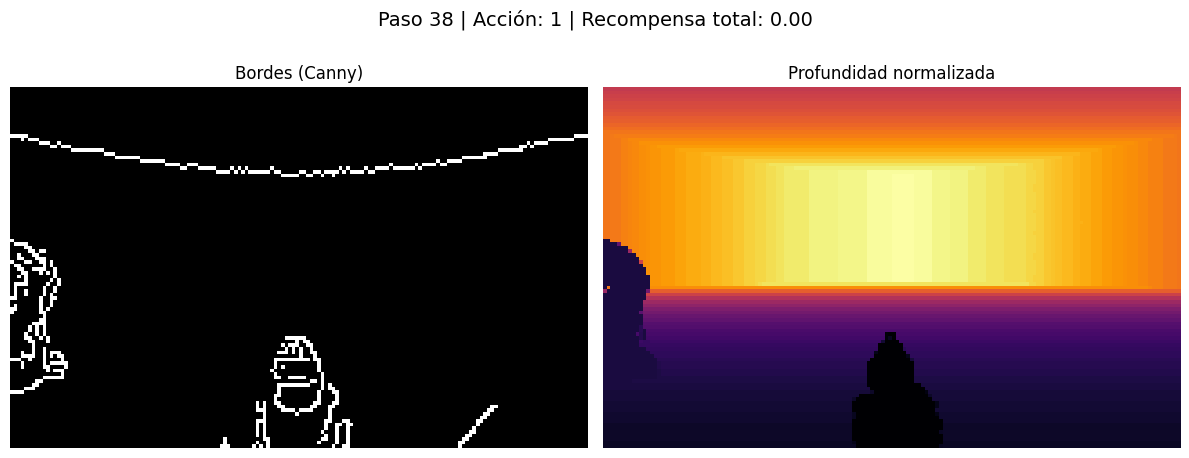

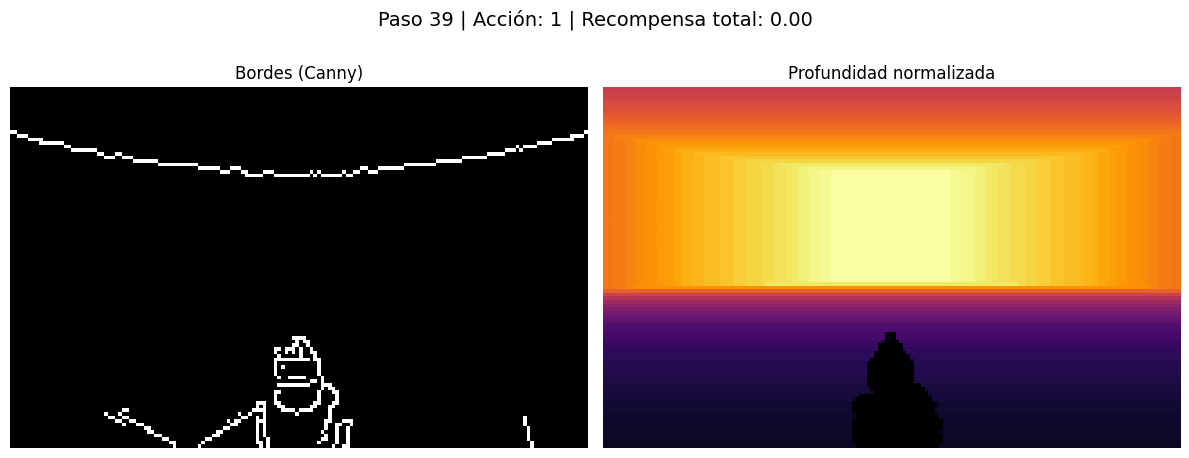

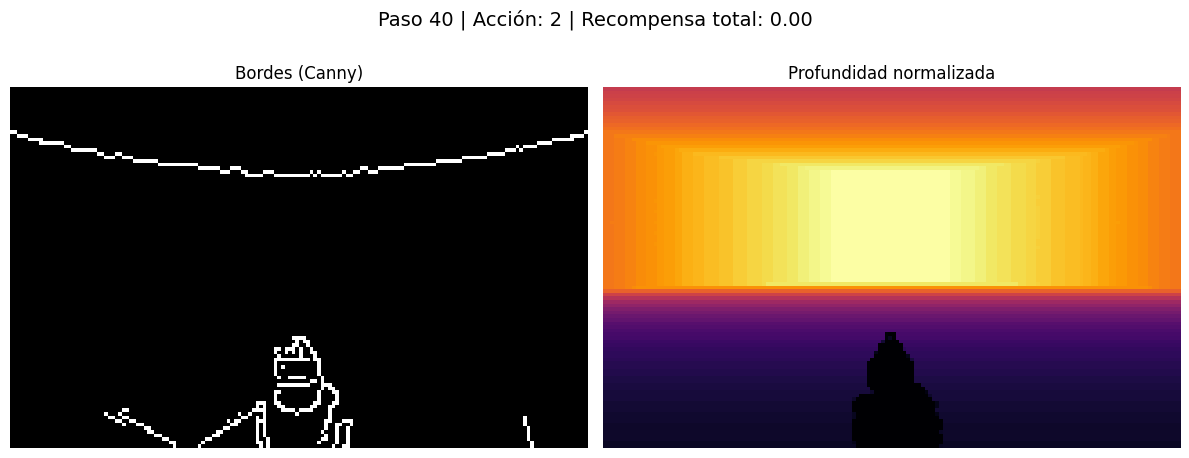

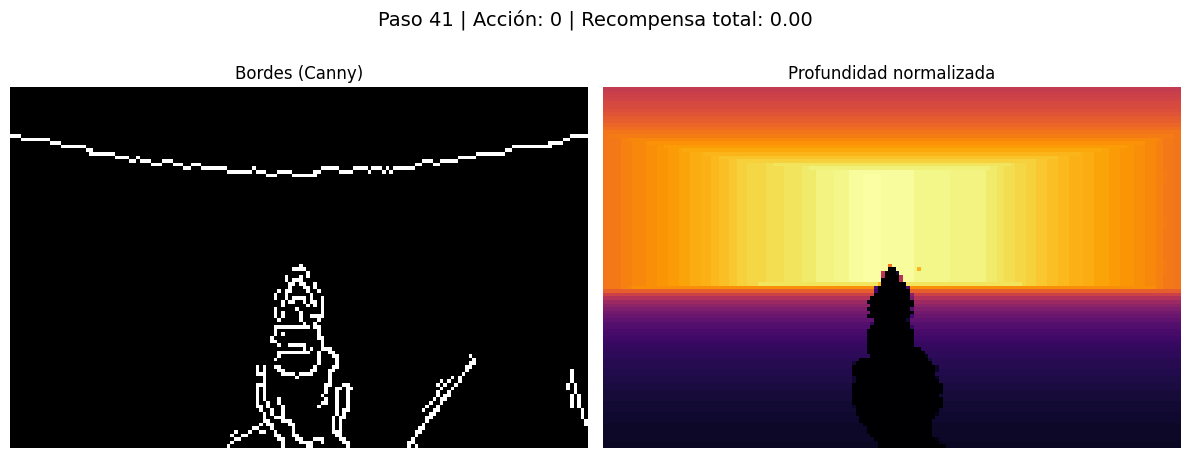

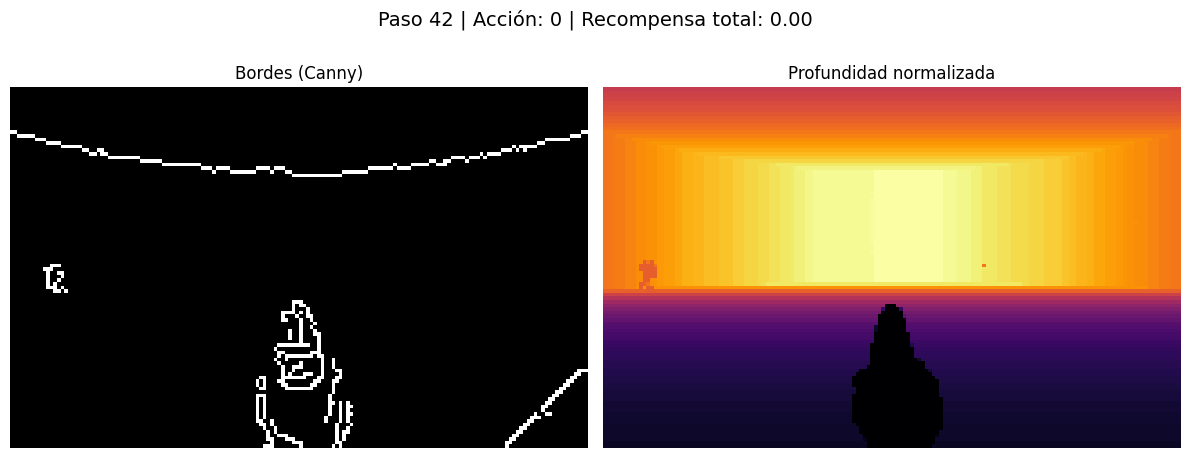

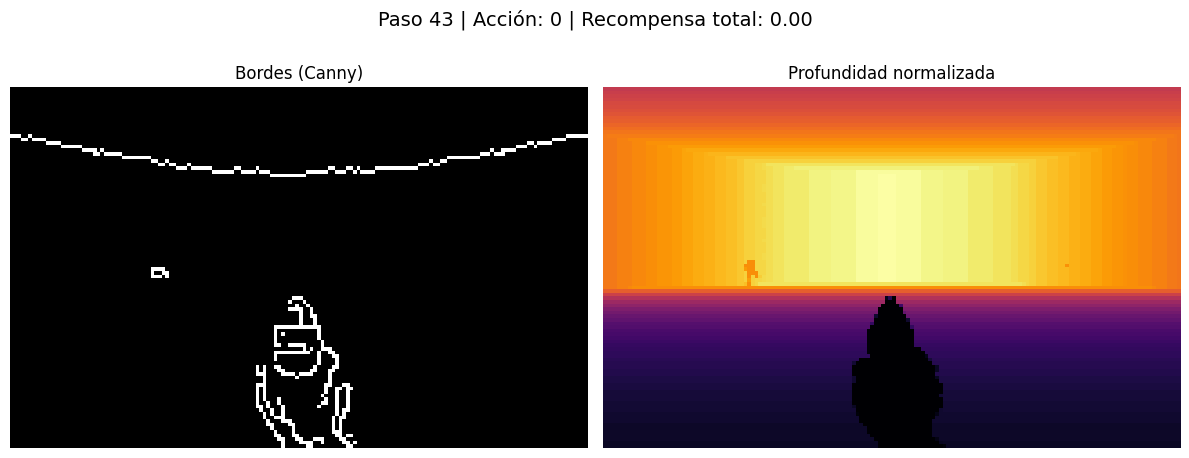

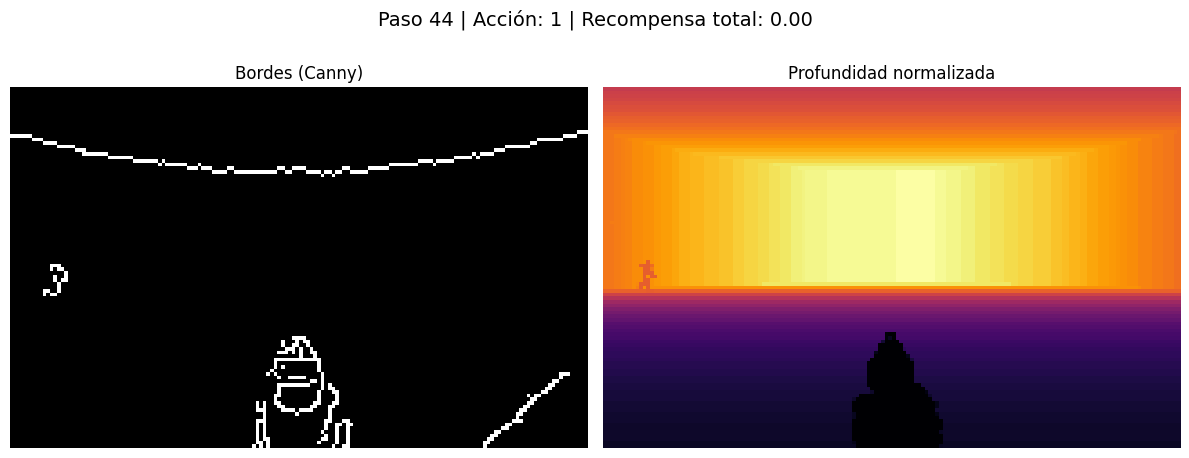

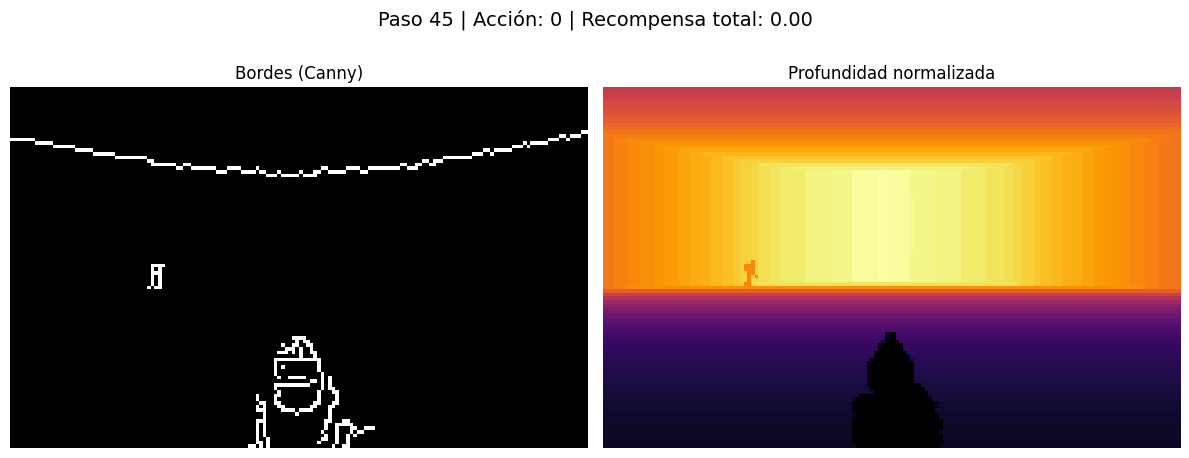

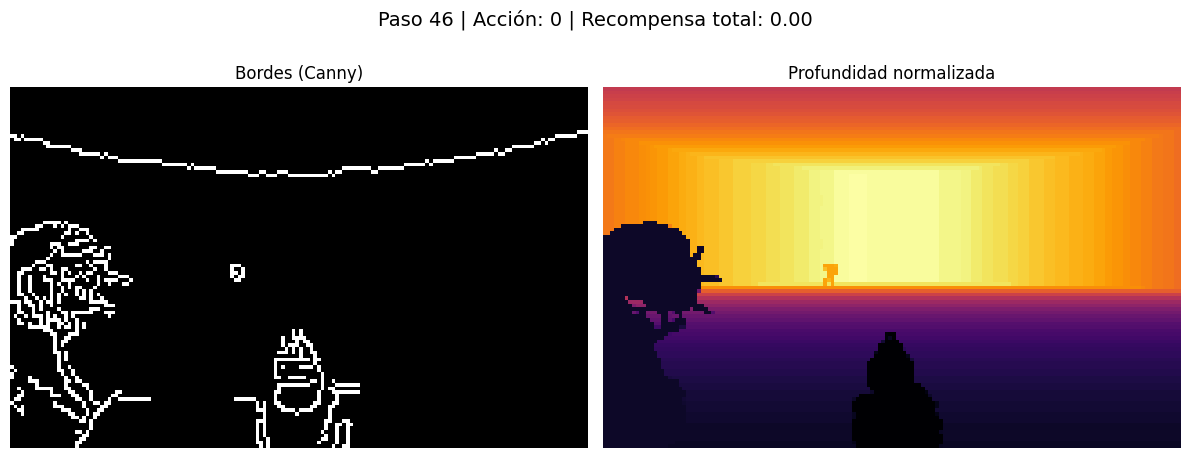

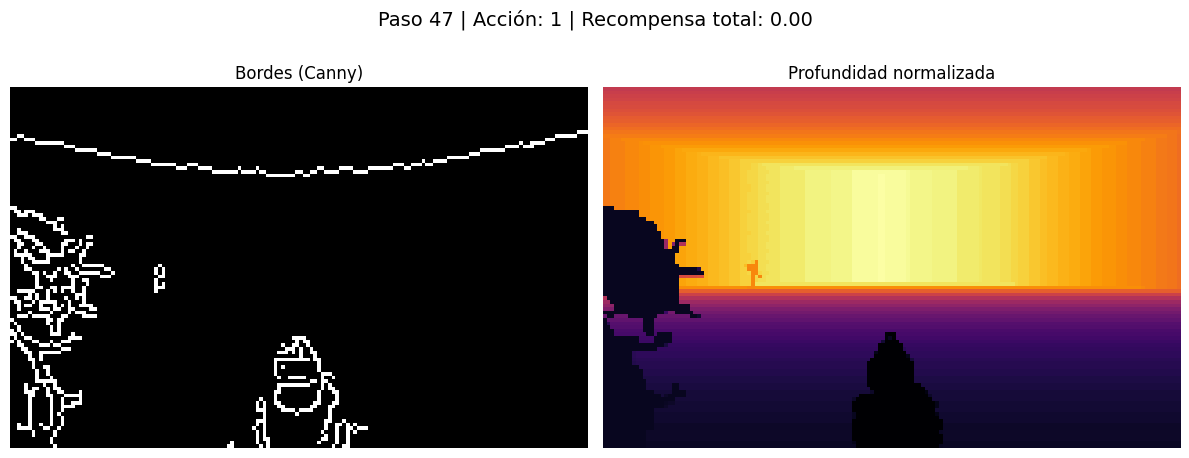

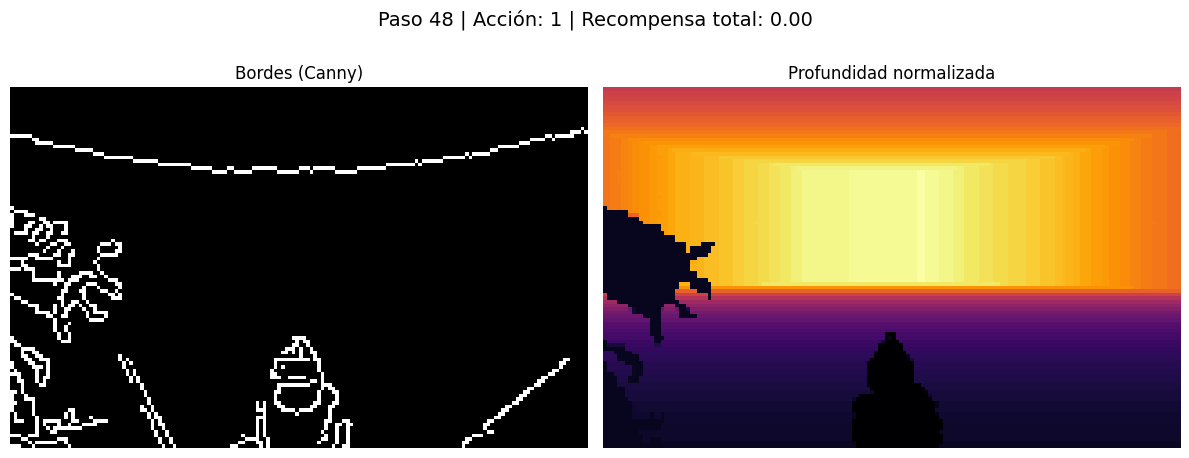

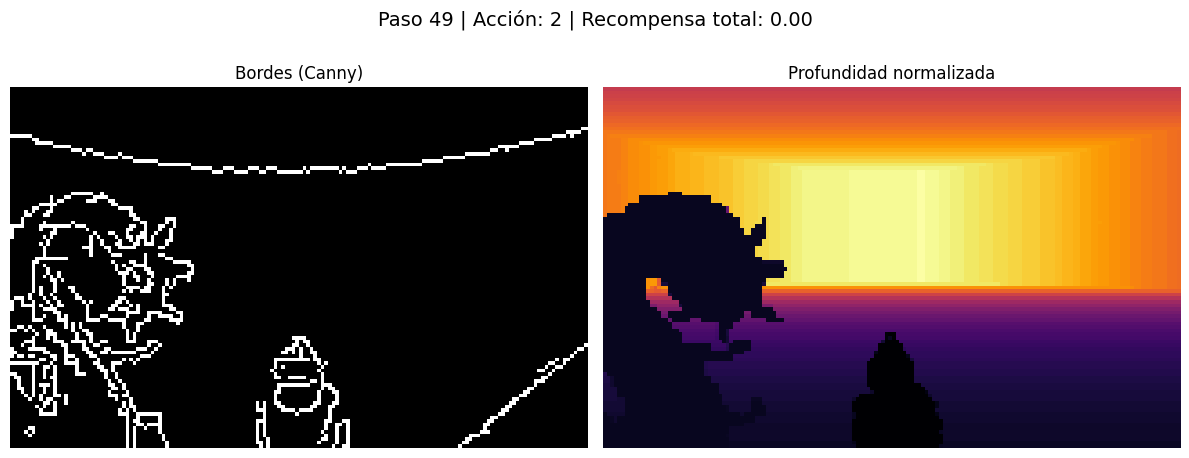

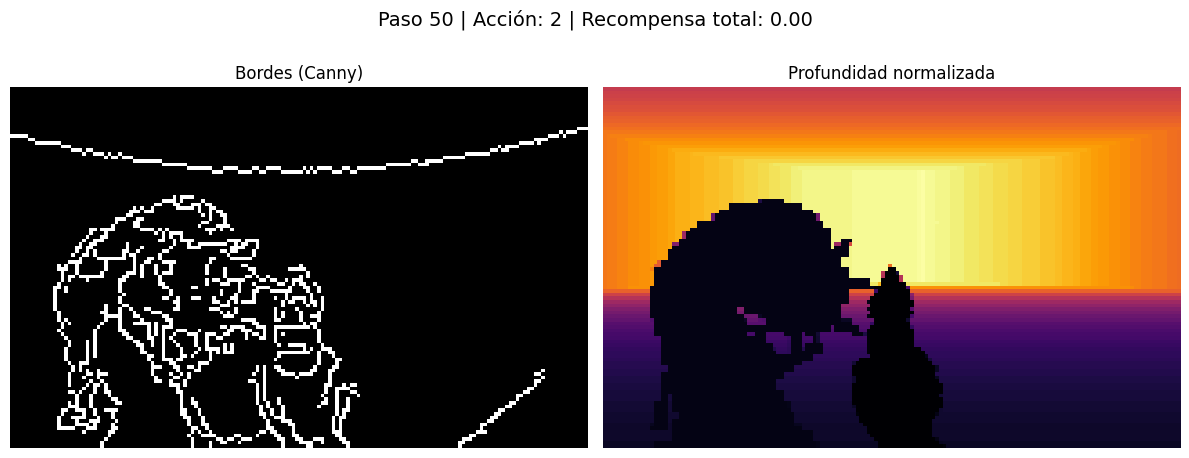

In [ ]:

env = VizDoomGym(config_path=r"D:\vizdoom_rl_project\config\defend_the_center.cfg")
obs = env.reset()

total_actions = 50
frame_skip = 4

for step in range(total_actions):
    action = np.random.randint(0, 3)
    reward_total = 0
    done = False

    # Ejecutar la misma acción 4 veces (frame_skip)
    for i in range(frame_skip):
        obs, reward, done, info = env.step(action)
        reward_total += reward
        if done:
            break

    # Separar canales
    edges = obs[:, :, 0]
    depth = obs[:, :, 1]

    # Mostrar nueva figura para esta acción
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].imshow(edges, cmap='gray')
    axs[0].set_title("Bordes (Canny)")
    axs[0].axis('off')

    axs[1].imshow(depth, cmap='inferno')
    axs[1].set_title("Profundidad normalizada")
    axs[1].axis('off')

    fig.suptitle(f"Paso {step+1} | Acción: {action} | Recompensa total: {reward_total:.2f}", fontsize=14)
    plt.tight_layout()
    plt.show()

    if done:
        print(" Episodio terminado")
        break

env.close()
